# Step1：資料前置處理


In [1]:
import pandas as pd
import numpy as np
import pickle

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning

import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
# data=pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')

data=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
#丟掉ID欄位 覺得這對接下來的資料分析沒有幫助
data.drop(columns='id', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [4]:
#檢查重複值
data[data.duplicated()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [5]:
#檢查缺失值
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
#缺失BMI的行只佔總數大概3~4% 討論後決定刪除
data.dropna(inplace = True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [9]:
df = data.copy()

In [10]:
#計算每個欄位的類別數量
for column in df.columns:
    unique_v = df[column].nunique()
    print(f'{column} 有 {unique_v} 種類別')

gender 有 3 種類別
age 有 104 種類別
hypertension 有 2 種類別
heart_disease 有 2 種類別
ever_married 有 2 種類別
work_type 有 5 種類別
Residence_type 有 2 種類別
avg_glucose_level 有 3852 種類別
bmi 有 418 種類別
smoking_status 有 4 種類別
stroke 有 2 種類別


In [11]:
#顯示文字欄位的各類別名稱
print('\n性別', df['gender'].value_counts())
print('\n婚姻狀況', df['ever_married'].value_counts())
print('\n工作類型', df['work_type'].value_counts())
print('\n居住地', df['Residence_type'].value_counts())
print('\n抽菸狀態', df['smoking_status'].value_counts())


性別 gender
Female    2897
Male      2011
Other        1
Name: count, dtype: int64

婚姻狀況 ever_married
Yes    3204
No     1705
Name: count, dtype: int64

工作類型 work_type
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: count, dtype: int64

居住地 Residence_type
Urban    2490
Rural    2419
Name: count, dtype: int64

抽菸狀態 smoking_status
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: count, dtype: int64


In [12]:
#文字轉數值表示
df['gender'] = df['gender'].map({'Female':0, 'Male':1, 'Other':2}).astype('int')
df['ever_married'] = df['ever_married'].map({'No':0, 'Yes':1}).astype('int')
df['work_type'] = df['work_type'].map({'children':0, 'Govt_job':1, 'Never_worked':2, 'Private':3, 'Self-employed':4}).astype('int')
df['Residence_type'] = df['Residence_type'].map({'Rural':0, 'Urban':1}).astype('int')
df['smoking_status'] = df['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3}).astype('int')

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,3,1,228.69,36.6,0,1
2,1,80.0,0,1,1,3,0,105.92,32.5,1,1
3,0,49.0,0,0,1,3,1,171.23,34.4,2,1
4,0,79.0,1,0,1,4,0,174.12,24.0,1,1
5,1,81.0,0,0,1,3,1,186.21,29.0,0,1


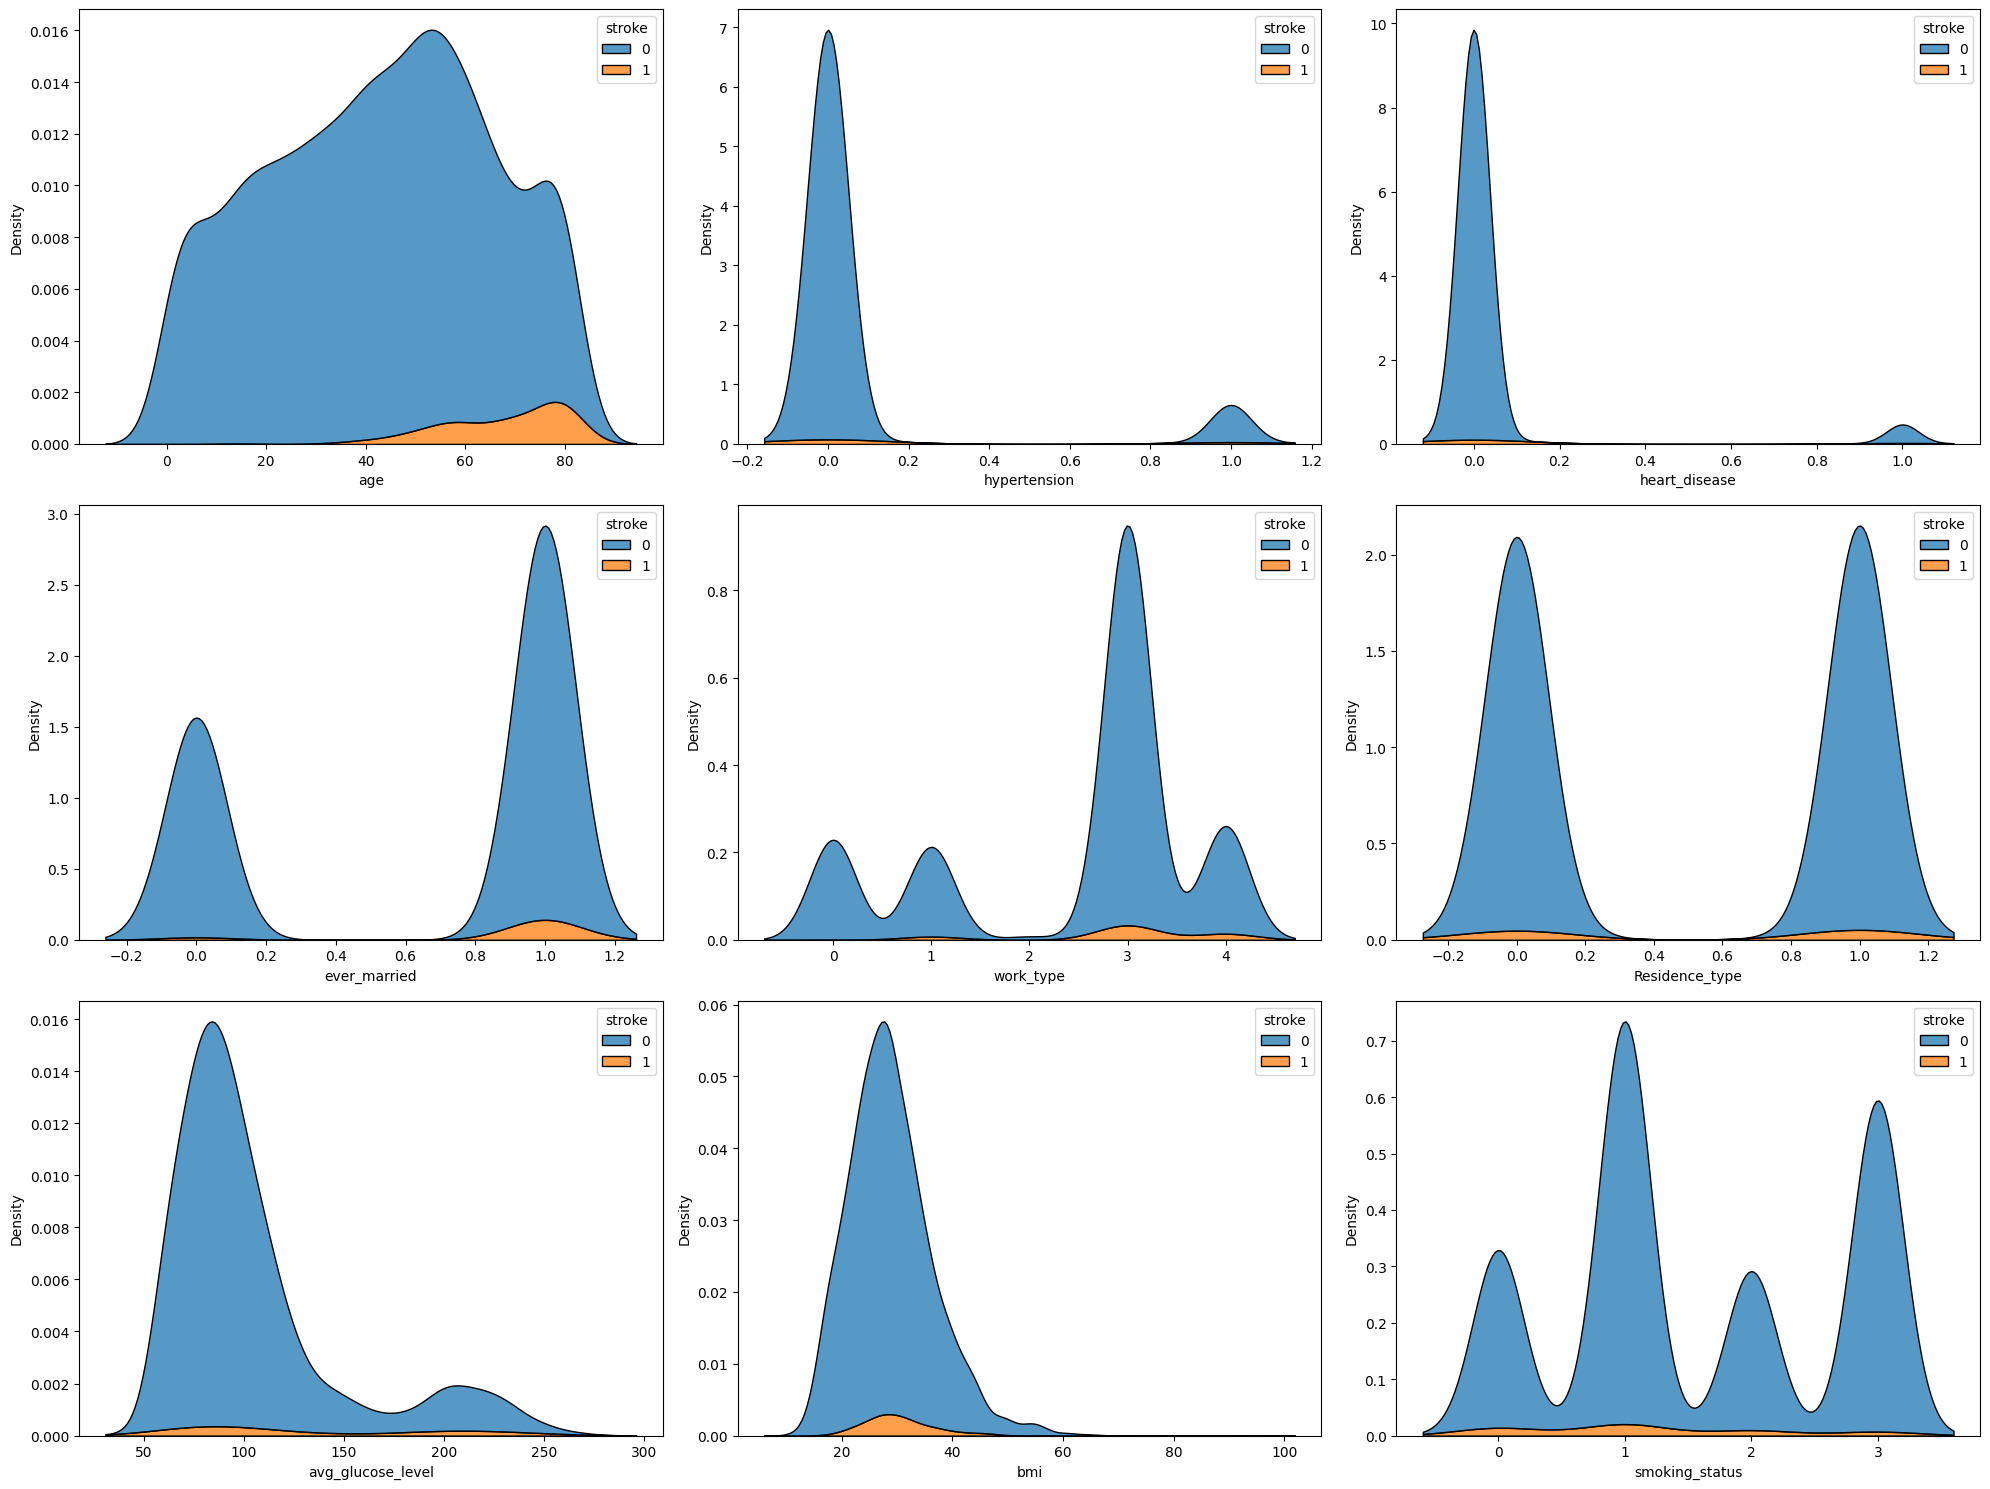

In [13]:
#視覺化中風人群在各欄位的分布圖
fig, ax = plt.subplots(3, 3, figsize=(20, 15))

i = 0

for column in df.columns[1:-1]:
    sns.kdeplot(x=column, hue='stroke', data=df, multiple='stack', ax=ax[i // 3, i % 3])
    i += 1

plt.tight_layout()
plt.show()

# Step2：優化資料

## Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

X = df.drop(['stroke'], axis=1)
y = df['stroke']

# Standardization
scale_standard = StandardScaler()
X1 = scale_standard.fit_transform(X)

# Normalization
scale_norm = Normalizer()
X2 = scale_norm.fit_transform(X)

# MinMax
scale_MinMax = MinMaxScaler()
X3 = scale_MinMax.fit_transform(X)



In [34]:
X1

array([[ 1.19842812,  1.07013796, -0.31806673, ...,  2.77769839,
         0.98134488, -1.45300459],
       [ 1.19842812,  1.64656262, -0.31806673, ...,  0.0138418 ,
         0.45926914, -0.53560272],
       [-0.83302341,  0.27201152, -0.31806673, ...,  1.48413156,
         0.70120668,  0.38179915],
       ...,
       [-0.83302341, -0.34875349, -0.31806673, ..., -0.50236926,
         0.21733161, -0.53560272],
       [ 1.19842812,  0.36069224, -0.31806673, ...,  1.37291993,
        -0.41934612, -1.45300459],
       [-0.83302341,  0.05030973, -0.31806673, ..., -0.45081569,
        -0.34294479,  1.29920102]])

In [35]:
X2

array([[0.00414725, 0.27786559, 0.        , ..., 0.94843405, 0.15178926,
        0.        ],
       [0.00731501, 0.5852011 , 0.        , ..., 0.77480625, 0.23773794,
        0.00731501],
       [0.        , 0.27006747, 0.        , ..., 0.94374803, 0.18959839,
        0.01102316],
       ...,
       [0.        , 0.36757284, 0.        , ..., 0.87156772, 0.32136369,
        0.01050208],
       [0.00568699, 0.29003631, 0.        , ..., 0.94568898, 0.14558685,
        0.        ],
       [0.        , 0.44205774, 0.        , ..., 0.85678828, 0.26322529,
        0.0301403 ]])

In [36]:
X3

array([[0.5       , 0.81689453, 0.        , ..., 0.80126489, 0.30126002,
        0.        ],
       [0.5       , 0.97558594, 0.        , ..., 0.23451205, 0.25429553,
        0.33333333],
       [0.        , 0.59716797, 0.        , ..., 0.53600776, 0.27605956,
        0.66666667],
       ...,
       [0.        , 0.42626953, 0.        , ..., 0.12865848, 0.2325315 ,
        0.33333333],
       [0.5       , 0.62158203, 0.        , ..., 0.51320284, 0.17525773,
        0.        ],
       [0.        , 0.53613281, 0.        , ..., 0.13922999, 0.18213058,
        1.        ]])

## Feature Selection

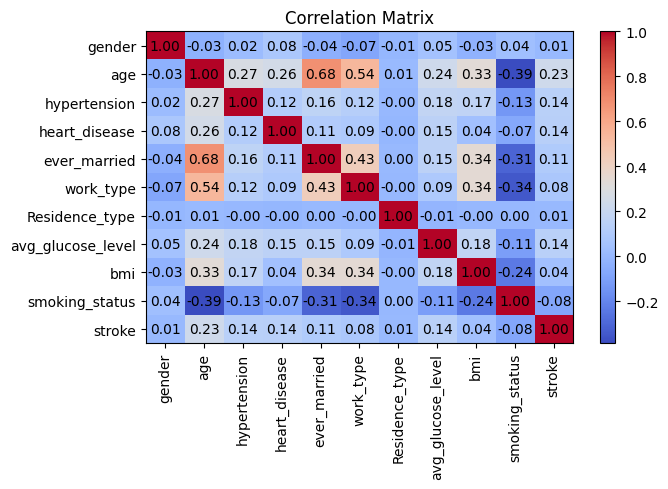

In [15]:
# Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(7, 5))
plt.title('Correlation Matrix')
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest', aspect='auto')
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, "{:.2f}".format(correlation_matrix.iloc[i, j]),
                 ha='center', va='center', color='black')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.tight_layout()
plt.show()

### Univariate Testing

In [16]:
# Regression Task

from sklearn.feature_selection import SelectKBest, f_regression

X = df.drop(['stroke'], axis=1)
y = df['stroke']

feature_selector = SelectKBest(f_regression, k = "all")
fit = feature_selector.fit(X,y)

p_values = pd.DataFrame(fit.pvalues_)
scores = pd.DataFrame(fit.scores_)
input_variable_names = pd.DataFrame(X.columns)
summary_stats = pd.concat([input_variable_names, p_values, scores], axis = 1)
summary_stats.columns = ["input_variable", "p_value", "f_score"]
summary_stats.sort_values(by = "p_value", inplace = True)
summary_stats

,input_variable,p_value,f_score
1,age,3.655693e-61,279.980918
2,hypertension,1.081679e-23,101.729361
7,avg_glucose_level,1.379969e-22,96.585072
3,heart_disease,2.774232e-22,95.175560
4,ever_married,1.564408e-13,54.796734
5,work_type,2.209197e-08,31.404661
9,smoking_status,1.006228e-07,28.446996
8,bmi,2.983269e-03,8.826500
0,gender,6.359746e-01,0.224073
6,Residence_type,6.726720e-01,0.178514


In [17]:
# set thresholds
p_value_threshold = 0.05
score_threshold = 5

selected_variables = summary_stats.loc[(summary_stats["f_score"] >= score_threshold) &
                                       (summary_stats["p_value"] <= p_value_threshold)]
selected_variables = selected_variables["input_variable"].tolist()
X_new = X[selected_variables]
X_new

,age,hypertension,avg_glucose_level,heart_disease,ever_married,work_type,smoking_status,bmi
0,67.0,0,228.69,1,1,3,0,36.6
2,80.0,0,105.92,1,1,3,1,32.5
3,49.0,0,171.23,0,1,3,2,34.4
4,79.0,1,174.12,0,1,4,1,24.0
5,81.0,0,186.21,0,1,3,0,29.0
...,...,...,...,...,...,...,...,...
5104,13.0,0,103.08,0,0,0,3,18.6
5106,81.0,0,125.20,0,1,4,1,40.0
5107,35.0,0,82.99,0,1,4,1,30.6
5108,51.0,0,166.29,0,1,3,0,25.6


In [18]:
# Classification Task

from sklearn.feature_selection import SelectKBest, chi2

X = df.drop(['stroke'], axis=1)
y = df['stroke']

feature_selector = SelectKBest(chi2, k = "all")
fit = feature_selector.fit(X,y)

p_values = pd.DataFrame(fit.pvalues_)
scores = pd.DataFrame(fit.scores_)
input_variable_names = pd.DataFrame(X.columns)
summary_stats = pd.concat([input_variable_names, p_values, scores], axis = 1)
summary_stats.columns = ["input_variable", "p_value", "chi2_score"]
summary_stats.sort_values(by = "p_value", inplace = True)
summary_stats

,input_variable,p_value,chi2_score
1,age,0.000000e+00,3144.139535
7,avg_glucose_level,0.000000e+00,1775.520314
2,hypertension,1.809252e-21,90.543821
3,heart_disease,4.414322e-21,88.779204
9,smoking_status,4.081043e-06,21.226400
5,work_type,5.605532e-06,20.618382
4,ever_married,1.429349e-05,18.829557
8,bmi,1.440781e-05,18.814363
0,gender,7.158952e-01,0.132460
6,Residence_type,7.667371e-01,0.087999


In [19]:
# set thresholds
p_value_threshold = 0.05
score_threshold = 5

selected_variables = summary_stats.loc[(summary_stats["chi2_score"] >= score_threshold) &
                                       (summary_stats["p_value"] <= p_value_threshold)]
selected_variables = selected_variables["input_variable"].tolist()
X_new = X[selected_variables]
X_new

,age,avg_glucose_level,hypertension,heart_disease,smoking_status,work_type,ever_married,bmi
0,67.0,228.69,0,1,0,3,1,36.6
2,80.0,105.92,0,1,1,3,1,32.5
3,49.0,171.23,0,0,2,3,1,34.4
4,79.0,174.12,1,0,1,4,1,24.0
5,81.0,186.21,0,0,0,3,1,29.0
...,...,...,...,...,...,...,...,...
5104,13.0,103.08,0,0,3,0,0,18.6
5106,81.0,125.20,0,0,1,4,1,40.0
5107,35.0,82.99,0,0,1,4,1,30.6
5108,51.0,166.29,0,0,0,3,1,25.6


### Recursive Feature Elimination with CV

In [20]:
# RFECV
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

def selection(regressor):

    X = df.drop(['stroke'], axis=1)
    y = df['stroke']

    rfecv = RFECV(estimator=regressor, step=1, cv=StratifiedKFold(5), scoring='accuracy')
    rfecv.fit(X, y)

    optimal_feature_count = rfecv.n_features_
    print(f"Optimal number of features: {optimal_feature_count}")

    plt.figure(figsize=(6, 4))
    mean_test_score = rfecv.cv_results_['mean_test_score']
    plt.plot(range(1, len(mean_test_score) + 1), mean_test_score, marker="o")
    plt.ylabel("Model Score")
    plt.xlabel("Number of Features")
    plt.title(f"Feature Selection using RFECV\nOptimal number of features is {optimal_feature_count} (at score of {round(np.max(mean_test_score), 4)})")
    plt.tight_layout()
    plt.show()

    return X.loc[:, rfecv.support_]

Optimal number of features: 7


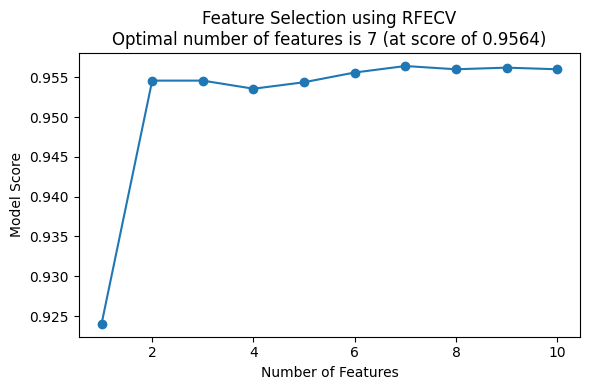

In [21]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier()
X_selected = selection(regressor)

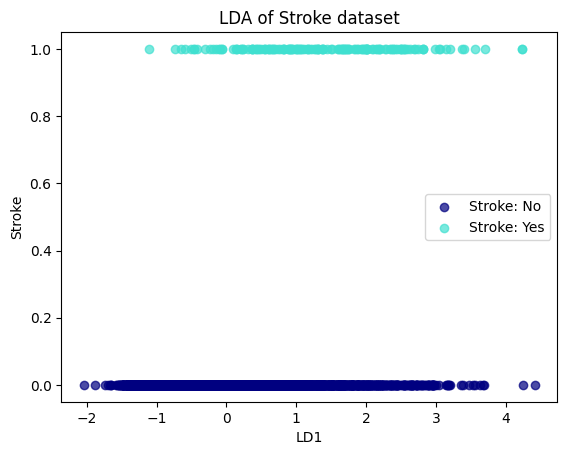

In [22]:
# Dimension Reduction
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = df.drop(['stroke'], axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lda = LinearDiscriminantAnalysis()

X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

plt.figure()
plt.scatter(X_train_lda[y_train == 0], y_train[y_train == 0], color='navy', alpha=0.7, label='Stroke: No')
plt.scatter(X_train_lda[y_train == 1], y_train[y_train == 1], color='turquoise', alpha=0.7, label='Stroke: Yes')
plt.xlabel('LD1')
plt.ylabel('Stroke')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of Stroke dataset')
plt.show()


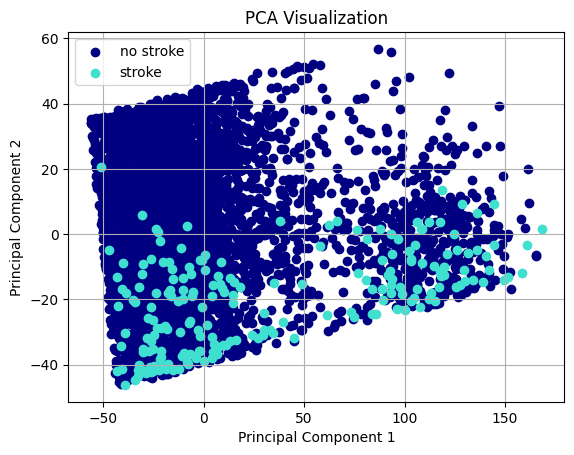

In [23]:
# Dimension Reduction
# PCA
from sklearn.decomposition import PCA

X = df.drop(['stroke'], axis=1)
y = df['stroke']

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

class_0 = X_pca[y == 0]
class_1 = X_pca[y == 1]

plt.scatter(class_0[:, 0], class_0[:, 1], color='navy', label='no stroke')
plt.scatter(class_1[:, 0], class_1[:, 1], color='turquoise', label='stroke')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.legend()
plt.grid(True)
plt.show()

# Step3：資料分析一 (使用原始優化資料)

In [ ]:
 # 提醒：feature scalling 特徵有換成X1、X2、X3、X_new之分！！

In [24]:
'''
模型1: Decision Tree (X1, X2, X3, X_new)
'''

'\n模型1: Decision Tree (X1, X2, X3, X_new)\n'

In [25]:
#模型1: Decision Tree (X1, X2, X3, X_new)

from sklearn import tree

ratio = 100
ratiovalues = [i for i in range(10, ratio, 10)]
depth = 21
depthvalues = [i for i in range(1, depth)]
leaf = 10
leafvalues = [i for i in range(1, leaf)]

best_models = {}

for feature_name, X in zip(['X1', 'X2', 'X3', 'X_new'], [X1, X2, X3, X_new]):
    best_feature_score = 0
    best_feature_model = {}

    for k in ratiovalues:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=k/100, random_state=42)
        for i in depthvalues:
            for j in leafvalues:
                clf = tree.DecisionTreeClassifier(random_state=42, max_depth=i, min_samples_leaf=j)
                clf.fit(X_train, y_train)
                y_pred_test = clf.predict(X_test)
                test_acc = accuracy_score(y_test, y_pred_test)

                fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
                roc_auc = auc(fpr, tpr)

                if roc_auc > best_feature_score:
                    best_feature_score = roc_auc
                    best_feature_model = {
                        "feature": feature_name,
                        "test_size": k,
                        "max_depth": i,
                        "min_samples_leaf": j,
                        "train_score": accuracy_score(y_train, clf.predict(X_train)),
                        "test_score": test_acc,
                        "f1_score": f1_score(y_test, y_pred_test, average='weighted'),
                        "recall": recall_score(y_test, y_pred_test, average='weighted'),
                        "precision": precision_score(y_test, y_pred_test, average='weighted', zero_division=1),
                        "roc_auc": roc_auc,
                        "confusion_matrix": confusion_matrix(y_test, y_pred_test)
                    }

    best_models[feature_name] = best_feature_model

print("X1, X2, X3, X_new最佳參數跟指標:")
for feature, model in best_models.items():
    print(f"\n使用特徵: {feature}")
    for key, value in model.items():
        print(f"{key}: {value}")

X1, X2, X3, X_new最佳參數跟指標:

使用特徵: X1
feature: X1
test_size: 30
max_depth: 3
min_samples_leaf: 1
train_score: 0.960128055878929
test_score: 0.9511201629327902
f1_score: 0.9272925179323862
recall: 0.9511201629327902
precision: 0.9535094014045072
roc_auc: 0.8320693552224602
confusion_matrix: [[1401    0]
 [  72    0]]

使用特徵: X2
feature: X2
test_size: 30
max_depth: 4
min_samples_leaf: 7
train_score: 0.9615832363213038
test_score: 0.945010183299389
f1_score: 0.9295070786091291
recall: 0.945010183299389
precision: 0.9201558701674668
roc_auc: 0.7578713617257515
confusion_matrix: [[1387   14]
 [  67    5]]

使用特徵: X3
feature: X3
test_size: 30
max_depth: 3
min_samples_leaf: 1
train_score: 0.960128055878929
test_score: 0.9511201629327902
f1_score: 0.9272925179323862
recall: 0.9511201629327902
precision: 0.9535094014045072
roc_auc: 0.8320693552224602
confusion_matrix: [[1401    0]
 [  72    0]]

使用特徵: X_new
feature: X_new
test_size: 30
max_depth: 3
min_samples_leaf: 1
train_score: 0.960128055878929

In [27]:
'''
模型2: RandomForest (X1, X2, X3, X_new)
'''

'\n模型2: RandomForest (X1, X2, X3, X_new)\n'

In [26]:
#模型2: RandomForest (X1, X2, X3, X_new)

from sklearn.ensemble import RandomForestClassifier

ratio = 100
ratiovalues = [i for i in range(10, ratio, 10)]
n_estimator = 250
n_estimatorvalues = [i for i in range(100, n_estimator, 50)]
depth = 8
depthvalues = [i for i in range(1, depth)]
leaf = 5
leafvalues = [i for i in range(1, leaf)]

best_models = {}

for feature_name, X in zip(['X1', 'X2', 'X3', 'X_new'], [X1, X2, X3, X_new]):
    best_feature_score = 0
    best_feature_model = {}

    for k in ratiovalues:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=k/100, random_state=42)
        for l in n_estimatorvalues:
            for i in depthvalues:
                for j in leafvalues:
                    clf = RandomForestClassifier(random_state=42, n_estimators=l, max_depth=i, min_samples_leaf=j)
                    clf.fit(X_train, y_train)
                    y_pred_train = clf.predict(X_train)
                    train_acc = accuracy_score(y_pred_train, y_train)
                    y_pred_test = clf.predict(X_test)
                    test_acc = accuracy_score(y_pred_test, y_test)

                    if roc_auc > best_feature_score:
                        best_feature_model = {
                            "feature": feature_name,
                            "test_size": k,
                            "no_of_estimators": l,
                            "max_depth": i,
                            "min_samples_leaf": j,
                            "train_score": train_acc,
                            "test_score": test_acc,
                            "f1_score": f1_score(y_test, y_pred_test, average='weighted'),
                            "recall": recall_score(y_test, y_pred_test, average='weighted'),
                            "precision": precision_score(y_test, y_pred_test, average='weighted', zero_division=1),
                            "roc_auc": roc_auc,
                            "confusion_matrix": confusion_matrix(y_test, y_pred_test)
                        }

    best_models[feature_name] = best_feature_model

print("X1, X2, X3, X_new最佳參數跟指標:")
for feature, model in best_models.items():
    print(f"\n使用特徵: {feature}")
    for key, value in model.items():
        print(f"{key}: {value}")

X1, X2, X3, X_new最佳參數跟指標:

使用特徵: X1
feature: X1
test_size: 90
no_of_estimators: 200
max_depth: 7
min_samples_leaf: 4
train_score: 0.9571428571428572
test_score: 0.9574564381081693
f1_score: 0.9366469802625811
recall: 0.9574564381081693
precision: 0.9592663927666133
roc_auc: 0.6121540855991995
confusion_matrix: [[4231    0]
 [ 188    0]]

使用特徵: X2
feature: X2
test_size: 90
no_of_estimators: 200
max_depth: 7
min_samples_leaf: 4
train_score: 0.9571428571428572
test_score: 0.9574564381081693
f1_score: 0.9366469802625811
recall: 0.9574564381081693
precision: 0.9592663927666133
roc_auc: 0.6121540855991995
confusion_matrix: [[4231    0]
 [ 188    0]]

使用特徵: X3
feature: X3
test_size: 90
no_of_estimators: 200
max_depth: 7
min_samples_leaf: 4
train_score: 0.9571428571428572
test_score: 0.9574564381081693
f1_score: 0.9366469802625811
recall: 0.9574564381081693
precision: 0.9592663927666133
roc_auc: 0.6121540855991995
confusion_matrix: [[4231    0]
 [ 188    0]]

使用特徵: X_new
feature: X_new
test_si

In [ ]:
'''
模型3: XGBoost (X1, X2, X3, X_new)
'''

'\n模型3: XGBoost (X1, X2, X3)\n'

In [28]:
#模型3: XGBoost (X1, X2, X3, X_new)

from xgboost.sklearn import XGBClassifier

ratio = 100
ratiovalues = [i for i in range(10, ratio, 10)]
n_estimator = 250
n_estimatorvalues = [i for i in range(100, n_estimator, 50)]
depth = 8
depthvalues = [i for i in range(1, depth)]
rate = 3
ratevalues = [i for i in range(1, rate)]

best_models = {}

for feature_name, X in zip(['X1', 'X2', 'X3', 'X_new'], [X1, X2, X3, X_new]):
    best_feature_score = 0
    best_feature_model = {}

    for k in ratiovalues:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=k/100, random_state=42)
        for l in n_estimatorvalues:
            for i in depthvalues:
                for j in ratevalues:
                    clf = XGBClassifier(random_state=42, n_estimators=l, max_depth=i, learning_rate=j)
                    clf.fit(X_train, y_train)
                    y_pred_train = clf.predict(X_train)
                    train_acc = accuracy_score(y_pred_train, y_train)
                    y_pred_test = clf.predict(X_test)
                    test_acc = accuracy_score(y_pred_test, y_test)

                    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
                    roc_auc = auc(fpr, tpr)

                    if roc_auc > best_feature_score:
                        best_feature_model = {
                            "feature": feature_name,
                            "test_size": k,
                            "no_of_estimators": l,
                            "max_depth": i,
                            "learning_rate": j,
                            "train_score": train_acc,
                            "test_score": test_acc,
                            "f1_score": f1_score(y_test, y_pred_test, average='weighted'),
                            "recall": recall_score(y_test, y_pred_test, average='weighted'),
                            "precision": precision_score(y_test, y_pred_test, average='weighted', zero_division=1),
                            "roc_auc": roc_auc,
                            "confusion_matrix": confusion_matrix(y_test, y_pred_test).tolist()
                        }

    best_models[feature_name] = best_feature_model

print("X1, X2, X3, X_new最佳參數跟指標:")
for feature, model in best_models.items():
    print(f"\n使用特徵: {feature}")
    for key, value in model.items():
        print(f"{key}: {value}")

X1, X2, X3, X_new最佳參數跟指標:

使用特徵: X1
feature: X1
test_size: 90
no_of_estimators: 200
max_depth: 7
learning_rate: 2
train_score: 1.0
test_score: 0.9422946367956552
f1_score: 0.9336475922713797
recall: 0.9422946367956552
precision: 0.9262112145060776
roc_auc: 0.6577641219569841
confusion_matrix: [[4148, 83], [172, 16]]

使用特徵: X2
feature: X2
test_size: 90
no_of_estimators: 200
max_depth: 7
learning_rate: 2
train_score: 1.0
test_score: 0.9493097985969676
f1_score: 0.9340024439889517
recall: 0.9493097985969676
precision: 0.9210561524467837
roc_auc: 0.6068148217060501
confusion_matrix: [[4191, 40], [184, 4]]

使用特徵: X3
feature: X3
test_size: 90
no_of_estimators: 200
max_depth: 7
learning_rate: 2
train_score: 1.0
test_score: 0.9422946367956552
f1_score: 0.9336475922713797
recall: 0.9422946367956552
precision: 0.9262112145060776
roc_auc: 0.6577641219569841
confusion_matrix: [[4148, 83], [172, 16]]

使用特徵: X_new
feature: X_new
test_size: 90
no_of_estimators: 200
max_depth: 7
learning_rate: 2
train

In [29]:
'''
模型4: SVM (X1, X2, X3, X_new)
'''

'\n模型4: SVM (X1, X2, X3, X_new)\n'

In [30]:
#模型4: SVM (X1, X2, X3, X_new)

from sklearn import svm

ratio = 100
ratiovalues = [i for i in range(10, ratio, 10)]
kernelvalues = ["rbf", "poly"]
gammavalues = ["scale"]

best_models = {}

for feature_name, X in zip(['X1', 'X2', 'X3', 'X_new'], [X1, X2, X3, X_new]):
    best_feature_score = 0
    best_feature_model = {}

    for k in ratiovalues:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=k/100, random_state=42)
        for i in kernelvalues:
            for j in gammavalues:
                clf = svm.SVC(random_state=42, kernel=i, gamma=j, probability=True)
                clf.fit(X_train, y_train)
                y_pred_train = clf.predict(X_train)
                y_pred_test = clf.predict(X_test)
                train_acc = accuracy_score(y_pred_train, y_train)
                test_acc = accuracy_score(y_pred_test, y_test)
                probs = clf.predict_proba(X_test)[:, 1]
                fpr, tpr, _ = roc_curve(y_test, probs)
                roc_auc = auc(fpr, tpr)

                if roc_auc > best_feature_score:
                    best_feature_model = {
                        "feature": feature_name,
                        "test_size": k,
                        "kernel": i,
                        "gamma": j,
                        "train_score": train_acc,
                        "test_score": test_acc,
                        "f1_score": f1_score(y_test, y_pred_test, average='weighted'),
                        "recall": recall_score(y_test, y_pred_test, average='weighted'),
                        "precision": precision_score(y_test, y_pred_test, average='weighted', zero_division=1),
                        "roc_auc": roc_auc,
                        "confusion_matrix": confusion_matrix(y_test, y_pred_test).tolist()
                    }
                    best_feature_score = roc_auc

    best_models[feature_name] = best_feature_model

print("X1, X2, X3, X_new最佳參數跟指標:")
for feature, model in best_models.items():
    print(f"\n使用特徵: {feature}")
    for key, value in model.items():
        print(f"{key}: {value}")

X1, X2, X3, X_new最佳參數跟指標:

使用特徵: X1
feature: X1
test_size: 90
kernel: rbf
gamma: scale
train_score: 0.9571428571428572
test_score: 0.9574564381081693
f1_score: 0.9366469802625811
recall: 0.9574564381081693
precision: 0.9592663927666133
roc_auc: 0.6943683149197664
confusion_matrix: [[4231, 0], [188, 0]]

使用特徵: X2
feature: X2
test_size: 90
kernel: poly
gamma: scale
train_score: 0.9571428571428572
test_score: 0.9574564381081693
f1_score: 0.9366469802625811
recall: 0.9574564381081693
precision: 0.9592663927666133
roc_auc: 0.713539126105694
confusion_matrix: [[4231, 0], [188, 0]]

使用特徵: X3
feature: X3
test_size: 90
kernel: rbf
gamma: scale
train_score: 0.9571428571428572
test_score: 0.9574564381081693
f1_score: 0.9366469802625811
recall: 0.9574564381081693
precision: 0.9592663927666133
roc_auc: 0.7017479897614868
confusion_matrix: [[4231, 0], [188, 0]]

使用特徵: X_new
feature: X_new
test_size: 40
kernel: rbf
gamma: scale
train_score: 0.9606112054329372
test_score: 0.9526476578411406
f1_score: 

In [ ]:
'''
模型5: KNN (X1, X2, X3, X_new)
'''

'\n模型5: KNN (X1, X2, X3)\n'

In [31]:
#模型5: KNN (X1, X2, X3, X_new)

from sklearn import neighbors

ratio = 100
ratiovalues = [i for i in range(10, ratio, 10)]
neighbor = 10
neighborvalues = [i for i in range(1, neighbor)]
p = 3
pvalues = [i for i in range(1, p)]

best_models = {}

for feature_name, X in zip(['X1', 'X2', 'X3', 'X_new'], [X1, X2, X3, X_new]):
    best_feature_score = 0
    best_feature_model = {}

    for k in ratiovalues:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=k/100, random_state=42)
        for i in neighborvalues:
            for j in pvalues:
                clf = neighbors.KNeighborsClassifier(n_neighbors=i, p=j)
                clf.fit(X_train, y_train)
                y_pred_train = clf.predict(X_train)
                train_acc = accuracy_score(y_pred_train, y_train)
                y_pred_test = clf.predict(X_test)
                test_acc = accuracy_score(y_pred_test, y_test)
                fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
                roc_auc = auc(fpr, tpr)

                if roc_auc > best_feature_score:
                    best_feature_score = roc_auc
                    best_feature_model = {
                        "feature": feature_name,
                        "test_size": k,
                        "neighbors": i,
                        "p": j,
                        "train_score": train_acc,
                        "test_score": test_acc,
                        "f1_score": f1_score(y_test, y_pred_test, average='weighted'),
                        "recall": recall_score(y_test, y_pred_test, average='weighted'),
                        "precision": precision_score(y_test, y_pred_test, average='weighted', zero_division=1),
                        "roc_auc": roc_auc,
                        "confusion_matrix": confusion_matrix(y_test, y_pred_test).tolist()
                    }

    best_models[feature_name] = best_feature_model

print("X1, X2, X3, X_new最佳參數跟指標:")
for feature, model in best_models.items():
    print(f"\n使用特徵: {feature}")
    for key, value in model.items():
        print(f"{key}: {value}")

X1, X2, X3, X_new最佳參數跟指標:

使用特徵: X1
feature: X1
test_size: 50
neighbors: 9
p: 2
train_score: 0.9576202118989405
test_score: 0.9572301425661914
f1_score: 0.9363125223852446
recall: 0.9572301425661914
precision: 0.9590594032710998
roc_auc: 0.6915967578520771
confusion_matrix: [[2350, 0], [105, 0]]

使用特徵: X2
feature: X2
test_size: 60
neighbors: 9
p: 2
train_score: 0.9556800815078961
test_score: 0.9582484725050916
f1_score: 0.9378177978442965
recall: 0.9582484725050916
precision: 0.9599916625532497
roc_auc: 0.6911663484328786
confusion_matrix: [[2823, 0], [123, 0]]

使用特徵: X3
feature: X3
test_size: 20
neighbors: 9
p: 2
train_score: 0.9602750190985485
test_score: 0.9460285132382892
f1_score: 0.9197911970678917
recall: 0.9460285132382892
precision: 0.9489414346215587
roc_auc: 0.72385604321953
confusion_matrix: [[929, 0], [53, 0]]

使用特徵: X_new
feature: X_new
test_size: 30
neighbors: 9
p: 1
train_score: 0.9595459837019791
test_score: 0.9511201629327902
f1_score: 0.9272925179323862
recall: 0.951

In [ ]:
'''
模型6: LogisticRegression (X1, X2, X3, X_new)
'''

'\n模型6: LogisticRegression (X1, X2, X3)\n'

In [32]:
#模型6: LogisticRegression (X1, X2, X3, X_new)

from sklearn.linear_model import LogisticRegression

ratio = 100
ratio_values = [i for i in range(10, ratio, 10)]
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
class_weight_values = [None, 'balanced']
solver_values = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

best_models = {}

for feature_name, X in zip(['X1', 'X2', 'X3', 'X_new'], [X1, X2, X3, X_new]):
    best_feature_score = 0
    best_feature_model = {}

    for k in ratio_values:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=k/100, random_state=42)
        for i in C_values:
            for j in class_weight_values:
                for r in solver_values:
                    clf = LogisticRegression(C=i, class_weight=j, solver=r, max_iter=5000)  # Set max_iter to ensure convergence
                    clf.fit(X_train, y_train)
                    y_pred_train = clf.predict(X_train)
                    train_acc = accuracy_score(y_pred_train, y_train)
                    y_pred_test = clf.predict(X_test)
                    test_acc = accuracy_score(y_pred_test, y_test)

                    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
                    roc_auc = auc(fpr, tpr)

                    if roc_auc > best_feature_score:
                        best_feature_score = roc_auc
                        best_feature_model = {
                            "feature": feature_name,
                            "test_size": k,
                            "C_values": i,
                            "class_weight_values": j,
                            "solver_values": r,
                            "train_score": train_acc,
                            "test_score": test_acc,
                            "f1_score": f1_score(y_test, y_pred_test, average='weighted'),
                            "recall": recall_score(y_test, y_pred_test, average='weighted'),
                            "precision": precision_score(y_test, y_pred_test, average='weighted', zero_division=1),
                            "roc_auc": roc_auc,
                            "confusion_matrix": confusion_matrix(y_test, y_pred_test).tolist()
                        }

    best_models[feature_name] = best_feature_model

print("X1, X2, X3, X_new最佳參數跟指標:")
for feature, model in best_models.items():
    print(f"\n使用特徵: {feature}")
    for key, value in model.items():
        print(f"{key}: {value}")

X1, X2, X3, X_new最佳參數跟指標:

使用特徵: X1
feature: X1
test_size: 30
C_values: 0.01
class_weight_values: balanced
solver_values: liblinear
train_score: 0.7043073341094296
test_score: 0.7019687712152071
f1_score: 0.7866567708027271
recall: 0.7019687712152071
precision: 0.9486316937056444
roc_auc: 0.8638769926243159
confusion_matrix: [[971, 430], [9, 63]]

使用特徵: X2
feature: X2
test_size: 30
C_values: 100
class_weight_values: balanced
solver_values: liblinear
train_score: 0.6728754365541327
test_score: 0.6720977596741344
f1_score: 0.7648506178395237
recall: 0.6720977596741344
precision: 0.9424239534621449
roc_auc: 0.8158061701958919
confusion_matrix: [[932, 469], [14, 58]]

使用特徵: X3
feature: X3
test_size: 30
C_values: 1
class_weight_values: None
solver_values: sag
train_score: 0.960128055878929
test_score: 0.9511201629327902
f1_score: 0.9272925179323862
recall: 0.9511201629327902
precision: 0.9535094014045072
roc_auc: 0.8633912284875882
confusion_matrix: [[1401, 0], [72, 0]]

使用特徵: X_new
feature

In [ ]:
'''
模型7: GaussianNB (X1, X2, X3, X_new)
'''

'\n模型7: GaussianNB (X1, X2, X3)\n'

In [33]:
#模型7: GaussianNB (X1, X2, X3, X_new)

from sklearn.naive_bayes import GaussianNB

ratio = 100
ratiovalues = [i for i in range(10, ratio, 10)]

best_models = {}

for feature_name, X in zip(['X1', 'X2', 'X3', 'X_new'], [X1, X2, X3, X_new]):
    best_feature_score = 0
    best_feature_model = {}

    for k in ratiovalues:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=k/100, random_state=42)
        clf = GaussianNB()
        clf.fit(X_train, y_train)
        y_pred_train = clf.predict(X_train)
        train_acc = accuracy_score(y_pred_train, y_train)
        y_pred_test = clf.predict(X_test)
        test_acc = accuracy_score(y_pred_test, y_test)

        fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
        roc_auc = auc(fpr, tpr)

        if roc_auc > best_feature_score:
            best_feature_score = roc_auc
            best_feature_model = {
                "feature": feature_name,
                "test_size": k,
                "train_score": train_acc,
                "test_score": test_acc,
                "f1_score": f1_score(y_test, y_pred_test, average='weighted'),
                "recall": recall_score(y_test, y_pred_test, average='weighted'),
                "precision": precision_score(y_test, y_pred_test, average='weighted', zero_division=1),
                "roc_auc": roc_auc,
                "confusion_matrix": confusion_matrix(y_test, y_pred_test).tolist()
            }

    best_models[feature_name] = best_feature_model

print("X1, X2, X3, X_new最佳參數跟指標:")
for feature, model in best_models.items():
    print(f"\n使用特徵: {feature}")
    for key, value in model.items():
        print(f"{key}: {value}")

X1, X2, X3, X_new最佳參數跟指標:

使用特徵: X1
feature: X1
test_size: 10
train_score: 0.8682661837935718
test_score: 0.8716904276985743
f1_score: 0.8949909780400905
recall: 0.8716904276985743
precision: 0.9266297743679016
roc_auc: 0.8421009098428454
confusion_matrix: [[416, 49], [14, 12]]

使用特徵: X2
feature: X2
test_size: 10
train_score: 0.8927116342236306
test_score: 0.8818737270875764
f1_score: 0.898960657467031
recall: 0.8818737270875764
precision: 0.9200709367249955
roc_auc: 0.829859387923904
confusion_matrix: [[424, 41], [17, 9]]

使用特徵: X3
feature: X3
test_size: 10
train_score: 0.8682661837935718
test_score: 0.8716904276985743
f1_score: 0.8949909780400905
recall: 0.8716904276985743
precision: 0.9266297743679016
roc_auc: 0.8421009098428454
confusion_matrix: [[416, 49], [14, 12]]

使用特徵: X_new
feature: X_new
test_size: 10
train_score: 0.8680398370303305
test_score: 0.869653767820774
f1_score: 0.8936910763480289
recall: 0.869653767820774
precision: 0.9263898836857251
roc_auc: 0.8425144747725393
c

In [ ]:
'''
模型8: MultinomialNB (X1, X2, X3, X_new)
'''

'\n模型8: MultinomialNB (X1, X2, X3)\n'

In [38]:
# 模型8: MultinomialNB (X2, X3, X_new)

# 需接收非負的特徵值 X1不行

from sklearn.naive_bayes import MultinomialNB

ratio = 100
ratiovalues = [i for i in range(10, ratio, 10)]
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]
fit_prior_values = [True, False]
class_prior_values = [None, [0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5]]

best_models = {}

for feature_name, X in zip(['X2', 'X3', 'X_new'], [X2, X3, X_new]):
    best_feature_score = 0
    best_feature_model = {}

    for k in ratiovalues:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=k/100, random_state=42)
        for i in alpha_values:
            for j in fit_prior_values:
                for r in class_prior_values:
                    clf = MultinomialNB(alpha=i, fit_prior=j, class_prior=r)
                    clf.fit(X_train, y_train)
                    y_pred_train = clf.predict(X_train)
                    train_acc = accuracy_score(y_pred_train, y_train)
                    y_pred_test = clf.predict(X_test)
                    test_acc = accuracy_score(y_pred_test, y_test)

                    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
                    roc_auc = auc(fpr, tpr)

                    if roc_auc > best_feature_score:
                        best_feature_score = roc_auc
                        best_feature_model = {
                            "feature": feature_name,
                            "test_size": k,
                            "alpha": i,
                            "fit_prior": j,
                            "class_prior": r,
                            "train_score": train_acc,
                            "test_score": test_acc,
                            "f1_score": f1_score(y_test, y_pred_test, average='weighted'),
                            "recall": recall_score(y_test, y_pred_test, average='weighted'),
                            "precision": precision_score(y_test, y_pred_test, average='weighted', zero_division=1),
                            "roc_auc": roc_auc,
                            "confusion_matrix": confusion_matrix(y_test, y_pred_test).tolist()
                        }

    best_models[feature_name] = best_feature_model

print("X2, X3, X_new最佳參數跟指標:")
for feature, model in best_models.items():
    print(f"\n使用特徵: {feature}")
    for key, value in model.items():
        print(f"{key}: {value}")


X2, X3, X_new最佳參數跟指標:

使用特徵: X2
feature: X2
test_size: 10
alpha: 0.01
fit_prior: True
class_prior: None
train_score: 0.9585785423268447
test_score: 0.9470468431771895
f1_score: 0.9212903390740441
recall: 0.9470468431771895
precision: 0.9498508799946906
roc_auc: 0.8094292803970223
confusion_matrix: [[465, 0], [26, 0]]

使用特徵: X3
feature: X3
test_size: 30
alpha: 0.001
fit_prior: True
class_prior: None
train_score: 0.960128055878929
test_score: 0.9511201629327902
f1_score: 0.9272925179323862
recall: 0.9511201629327902
precision: 0.9535094014045072
roc_auc: 0.7647117138551828
confusion_matrix: [[1401, 0], [72, 0]]

使用特徵: X_new
feature: X_new
test_size: 10
alpha: 0.001
fit_prior: True
class_prior: None
train_score: 0.8478949751018561
test_score: 0.8594704684317719
f1_score: 0.8884947400224841
recall: 0.8594704684317719
precision: 0.9304298294860814
roc_auc: 0.8221670802315963
confusion_matrix: [[408, 57], [12, 14]]


# Step4：資料分析二 (使用平衡過之資料)

In [ ]:
#數據平衡

from imblearn.over_sampling import SMOTE
from collections import Counter

X = df.drop('stroke', axis=1)
y = df['stroke']

smo = SMOTE(random_state=42)
X_smo, y_smo = smo.fit_resample(X, y)
print(Counter(y_smo))

Counter({1: 4700, 0: 4700})


In [ ]:
'''
建立監督式學習的8種分類模型
'''

'\n建立監督式學習的8種分類模型\n'

In [ ]:
#模型1: Decision Tree

from sklearn import tree

ratio = 100
ratiovalues = [i for i in range(10, ratio, 10)]
depth = 21
depthvalues = [i for i in range(1, depth)]
leaf = 10
leafvalues = [i for i in range(1, leaf)]
relative_best_train_score = 0
relative_best_test_score = 0
relative_best_ratio = 0
relative_best_depth = 0
relative_best_leaf = 0
relative_best_f1_score = 0
relative_best_recall = 0
relative_best_precision = 0
relative_best_roc_auc = 0

for k in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(X_smo, y_smo, test_size=k/100, random_state=42)
    for i in depthvalues:
        for j in leafvalues:
            clf = tree.DecisionTreeClassifier(random_state=42, max_depth=i, min_samples_leaf=j)
            clf.fit(X_train, y_train)
            y_pred_test = clf.predict(X_test)
            test_acc = accuracy_score(y_test, y_pred_test)

            fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
            roc_auc = auc(fpr, tpr)

            if roc_auc > relative_best_roc_auc:
                relative_best_train_score = accuracy_score(y_train, clf.predict(X_train))
                relative_best_test_score = test_acc
                relative_best_ratio = k
                relative_best_depth = i
                relative_best_leaf = j
                relative_best_f1_score = f1_score(y_test, y_pred_test, average='weighted')
                relative_best_recall = recall_score(y_test, y_pred_test, average='weighted')
                relative_best_precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=1)
                relative_best_roc_auc = roc_auc
                best_fpr, best_tpr = fpr, tpr
                best_cm = confusion_matrix(y_test, y_pred_test)
                best_clf = clf

print("best ratio of testing data:", relative_best_ratio,
        "\nbest depth:", relative_best_depth,
        "\nbest min_sample_leaf:", relative_best_leaf,
        "\nTraining score:", relative_best_train_score,
        "\nTesting score:", relative_best_test_score,
        "\nF1 score:", relative_best_f1_score,
        "\nRecall:", relative_best_recall,
        "\nPrecision:", relative_best_precision,
        "\nROC AUC:", relative_best_roc_auc,
        "\n\nConfusion Matrix:\n", best_cm)


with open('best_decision_tree_model.pkl', 'wb') as file:
    pickle.dump(best_clf, file)

best ratio of testing data: 10 
best depth: 17 
best min_sample_leaf: 5 
Training score: 0.9542553191489361 
Testing score: 0.9191489361702128 
F1 score: 0.9191489361702128 
Recall: 0.9191489361702128 
Precision: 0.919556797559768 
ROC AUC: 0.9608423778927875 

Confusion Matrix:
 [[432  45]
 [ 31 432]]


In [ ]:
#模型2: KNN

from sklearn import neighbors

ratio = 100
ratiovalues = [i for i in range(10, ratio, 10)]
neighbor = 10
neighborvalues = [i for i in range(1, neighbor)]
p = 3
pvalues = [i for i in range(1, p)]
relative_best_train_score = 0
relative_best_test_score = 0
relative_best_ratio = 0
relative_best_neighbor = 0
relative_best_p = 0
relative_best_f1_score = 0
relative_best_recall = 0
relative_best_precision = 0
relative_best_roc_auc = 0

for k in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(X_smo, y_smo, test_size=k/100, random_state=42)
    for i in neighborvalues:
        for j in pvalues:
            clf = neighbors.KNeighborsClassifier(n_neighbors=i, p=j)
            clf.fit(X_train, y_train)
            y_pred_test = clf.predict(X_test)
            test_acc = accuracy_score(y_test, y_pred_test)

            fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
            roc_auc = auc(fpr, tpr)

            if roc_auc > relative_best_roc_auc:
                relative_best_train_score = accuracy_score(y_train, clf.predict(X_train))
                relative_best_test_score = test_acc
                relative_best_ratio = k
                relative_best_neighbor = i
                relative_best_p = j
                relative_best_f1_score = f1_score(y_test, y_pred_test, average='weighted')
                relative_best_recall = recall_score(y_test, y_pred_test, average='weighted')
                relative_best_precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=1)
                relative_best_roc_auc = roc_auc
                best_fpr, best_tpr = fpr, tpr
                best_cm = confusion_matrix(y_test, y_pred_test)
                best_clf = clf

print("best ratio of testing data:", relative_best_ratio,
        "\nbest neighbors:", relative_best_neighbor,
        "\nbest p:", relative_best_p,
        "\nTraining score:", relative_best_train_score,
        "\nTesting score:", relative_best_test_score,
        "\nF1 score:", relative_best_f1_score,
        "\nRecall:", relative_best_recall,
        "\nPrecision:", relative_best_precision,
        "\nROC AUC:", relative_best_roc_auc,
        "\n\nconfusion matrix:\n", best_cm)

with open('best_knn_model.pkl', 'wb') as file:
    pickle.dump(best_clf, file)

best ratio of testing data: 10 
best neighbors: 6 
best p: 1 
Training score: 0.9274231678486997 
Testing score: 0.9170212765957447 
F1 score: 0.9166518388950042 
Recall: 0.9170212765957447 
Precision: 0.9266283121498482 
ROC AUC: 0.9707653576393134 

confusion matrix:
 [[403  74]
 [  4 459]]


In [ ]:
#模型3: RandomForest

from sklearn.ensemble import RandomForestClassifier

ratio = 100
ratiovalues = [i for i in range(10, ratio, 10)]
n_estimator = 250
n_estimatorvalues = [i for i in range(100, n_estimator, 50)]
depth = 8
depthvalues = [i for i in range(1, depth)]
leaf = 5
leafvalues = [i for i in range(1, leaf)]
relative_best_train_score = 0
relative_best_test_score = 0
relative_best_ratio = 0
relative_best_estimators = 0
relative_best_depth = 0
relative_best_leaf = 0
relative_best_f1_score = 0
relative_best_recall = 0
relative_best_precision = 0
relative_best_roc_auc = 0

for k in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(X_smo, y_smo, test_size=k/100, random_state=71)
    for l in n_estimatorvalues:
        for i in depthvalues:
            for j in leafvalues:
                clf = RandomForestClassifier(random_state=71, n_estimators=l, max_depth=i, min_samples_leaf=j)
                clf.fit(X_train, y_train)
                y_pred_test = clf.predict(X_test)
                test_acc = accuracy_score(y_test, y_pred_test)

                fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
                roc_auc = auc(fpr, tpr)

                if roc_auc > relative_best_roc_auc:
                    relative_best_train_score = accuracy_score(y_train, clf.predict(X_train))
                    relative_best_test_score = test_acc
                    relative_best_ratio = k
                    relative_best_estimators = l
                    relative_best_depth = i
                    relative_best_leaf = j
                    relative_best_f1_score = f1_score(y_test, y_pred_test, average='weighted')
                    relative_best_recall = recall_score(y_test, y_pred_test, average='weighted')
                    relative_best_precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=1)
                    relative_best_roc_auc = roc_auc
                    best_fpr, best_tpr = fpr, tpr
                    best_cm = confusion_matrix(y_test, y_pred_test)
                    best_clf = clf

print("best ratio of testing data:", relative_best_ratio,
        "\nbest no. of estimators:", relative_best_estimators,
        "\nbest depth:", relative_best_depth,
        "\nbest min_sample_leaf:", relative_best_leaf,
        "\nTraining score:", relative_best_train_score,
        "\nTesting score:", relative_best_test_score,
        "\nF1 score:", relative_best_f1_score,
        "\nRecall:", relative_best_recall,
        "\nPrecision:", relative_best_precision,
        "\nROC AUC:", relative_best_roc_auc,
        "\n\nconfusion matrix:\n", best_cm)

with open('best_random_forest_model.pkl', 'wb') as file:
    pickle.dump(best_clf, file)

best ratio of testing data: 10 
best no. of estimators: 150 
best depth: 7 
best min_sample_leaf: 1 
Training score: 0.8823877068557919 
Testing score: 0.8734042553191489 
F1 score: 0.8729392406244301 
Recall: 0.8734042553191489 
Precision: 0.8761792041310957 
ROC AUC: 0.9441181269375102 

confusion matrix:
 [[373  81]
 [ 38 448]]


In [ ]:
#模型4: XGBoost

from xgboost.sklearn import XGBClassifier

ratio = 100
ratiovalues = [i for i in range(10, ratio, 10)]
n_estimator = 250
n_estimatorvalues = [i for i in range(100, n_estimator, 50)]
depth = 8
depthvalues = [i for i in range(1, depth)]
rate = 3
ratevalues = [i for i in range(1, rate)]
relative_best_train_score = 0
relative_best_test_score = 0
relative_best_ratio = 0
relative_best_estimators = 0
relative_best_depth = 0
relative_best_rate = 0
relative_best_f1_score = 0
relative_best_recall = 0
relative_best_precision = 0
relative_best_roc_auc = 0

for k in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(X_smo, y_smo, test_size=k/100, random_state=42)
    for l in n_estimatorvalues:
        for i in depthvalues:
            for j in ratevalues:
                clf = XGBClassifier(random_state=42, n_estimators=l, max_depth=i, learning_rate=j)
                clf.fit(X_train, y_train)
                y_pred_test = clf.predict(X_test)
                test_acc = accuracy_score(y_test, y_pred_test)

                fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
                roc_auc = auc(fpr, tpr)

                if roc_auc > relative_best_roc_auc:
                    relative_best_train_score = accuracy_score(y_train, clf.predict(X_train))
                    relative_best_test_score = test_acc
                    relative_best_ratio = k
                    relative_best_estimators = l
                    relative_best_depth = i
                    relative_best_rate = j
                    relative_best_f1_score = f1_score(y_test, y_pred_test, average='weighted')
                    relative_best_recall = recall_score(y_test, y_pred_test, average='weighted')
                    relative_best_precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=1)
                    relative_best_roc_auc = roc_auc
                    best_fpr, best_tpr = fpr, tpr
                    best_cm = confusion_matrix(y_test, y_pred_test)
                    best_clf = clf

print("best ratio of testing data:", relative_best_ratio,
        "\nbest no. of estimators:", relative_best_estimators,
        "\nbest depth:", relative_best_depth,
        "\nbest learning_rate:", relative_best_rate,
        "\nTraining score:", relative_best_train_score,
        "\nTesting score:", relative_best_test_score,
        "\nF1 score:", relative_best_f1_score,
        "\nRecall:", relative_best_recall,
        "\nPrecision:", relative_best_precision,
        "\nROC AUC:", relative_best_roc_auc,
        "\n\nconfusion matrix:\n", best_cm)

with open('best_xgboost_model.pkl', 'wb') as file:
    pickle.dump(best_clf, file)

best ratio of testing data: 10 
best no. of estimators: 100 
best depth: 7 
best learning_rate: 1 
Training score: 1.0 
Testing score: 0.9638297872340426 
F1 score: 0.9638314248214909 
Recall: 0.9638297872340426 
Precision: 0.9638679691543254 
ROC AUC: 0.9942404607631389 

confusion matrix:
 [[458  19]
 [ 15 448]]


In [ ]:
#模型5: LogisticRegression

from sklearn.linear_model import LogisticRegression

ratio = 100
ratio_values = [i for i in range(10, ratio, 10)]
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
class_weight_values = [None, 'balanced']
solver_values = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

best_train_score = 0
best_test_score = 0
best_ratio = 0
best_C = 0
best_class_weight = ''
best_solver = ''
best_f1_score = 0
best_recall = 0
best_precision = 0
best_roc_auc = 0

for k in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X_smo, y_smo, test_size=k/100, random_state=42)
    for i in C_values:
        for j in class_weight_values:
            for r in solver_values:
                clf = LogisticRegression(C=i, class_weight=j, solver=r, max_iter=1000)
                clf.fit(X_train, y_train)
                y_pred_test = clf.predict(X_test)
                test_acc = accuracy_score(y_test, y_pred_test)

                fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
                roc_auc = auc(fpr, tpr)

                if roc_auc > best_roc_auc:
                    best_train_score = accuracy_score(y_train, clf.predict(X_train))
                    best_test_score = test_acc
                    best_ratio = k
                    best_C = i
                    best_class_weight = j
                    best_solver = r
                    best_f1_score = f1_score(y_test, y_pred_test, average='weighted')
                    best_recall = recall_score(y_test, y_pred_test, average='weighted')
                    best_precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=1)
                    best_roc_auc = roc_auc
                    best_fpr, best_tpr = fpr, tpr
                    best_cm = confusion_matrix(y_test, y_pred_test)
                    best_clf = clf

print("best ratio of testing data:", best_ratio,
        "\nbest C:", best_C,
        "\nbest class weight:", best_class_weight,
        "\nbest solver:", best_solver,
        "\nTraining score:", best_train_score,
        "\nTesting score:", best_test_score,
        "\nF1 score:", best_f1_score,
        "\nRecall:", best_recall,
        "\nPrecision:", best_precision,
        "\nROC AUC:", best_roc_auc,
        "\n\nconfusion matrix:\n", best_cm)

with open('best_logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(best_clf, file)

best ratio of testing data: 10 
best C: 0.1 
best class weight: balanced 
best solver: lbfgs 
Training score: 0.8062647754137116 
Testing score: 0.8148936170212766 
F1 score: 0.8149019976158653 
Recall: 0.8148936170212766 
Precision: 0.814939889964021 
ROC AUC: 0.9064844623750854 

confusion matrix:
 [[388  89]
 [ 85 378]]


In [ ]:
#模型6: Gaussian Naive bayes

from sklearn.naive_bayes import GaussianNB

ratio = 100
ratiovalues = [i for i in range(10, ratio, 10)]
relative_best_train_score = 0
relative_best_test_score = 0
relative_best_ratio = 0
relative_best_f1_score = 0
relative_best_recall = 0
relative_best_precision = 0
relative_best_roc_auc = 0

for k in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(X_smo, y_smo, test_size=k/100, random_state=42)
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    y_pred_test = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)

    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    if roc_auc > relative_best_roc_auc:
        relative_best_train_score = accuracy_score(y_train, clf.predict(X_train))
        relative_best_test_score = test_acc
        relative_best_ratio = k
        relative_best_f1_score = f1_score(y_test, y_pred_test, average='weighted')
        relative_best_recall = recall_score(y_test, y_pred_test, average='weighted')
        relative_best_precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=1)
        relative_best_roc_auc = roc_auc
        best_fpr, best_tpr = fpr, tpr
        best_cm = confusion_matrix(y_test, y_pred_test)
        best_clf = clf

print("best ratio of testing data:", relative_best_ratio,
        "\nTraining score:", relative_best_train_score,
        "\nTesting score:", relative_best_test_score,
        "\nF1 score:", relative_best_f1_score,
        "\nRecall:", relative_best_recall,
        "\nPrecision:", relative_best_precision,
        "\nROC AUC:", relative_best_roc_auc,
        "\n\nconfusion matrix:\n", best_cm)


with open('best_gaussian_nb_model.pkl', 'wb') as file:
    pickle.dump(best_clf, file)

best ratio of testing data: 10 
Training score: 0.7782505910165485 
Testing score: 0.7925531914893617 
F1 score: 0.7921886067986327 
Recall: 0.7925531914893617 
Precision: 0.7958112854246102 
ROC AUC: 0.8749790582791113 

confusion matrix:
 [[356 121]
 [ 74 389]]


In [ ]:
#模型7: Multinomail Naive bayes

from sklearn.naive_bayes import MultinomialNB

ratio = 100
ratiovalues = [i for i in range(10, ratio, 10)]
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]
fit_prior_values = [True, False]
class_prior_values = [None, [0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5]]

relative_best_train_score = 0
relative_best_test_score = 0
relative_best_ratio = 0
relative_best_alpha = 0
relative_best_fit_prior = True
relative_best_class_prior = None
relative_best_f1_score = 0
relative_best_recall = 0
relative_best_precision = 0
relative_best_roc_auc = 0

for k in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(X_smo, y_smo, test_size=k/100, random_state=42)
    for i in alpha_values:
        for j in fit_prior_values:
            for r in class_prior_values:
                clf = MultinomialNB(alpha=i, fit_prior=j, class_prior=r)
                clf.fit(X_train, y_train)
                y_pred_test = clf.predict(X_test)
                test_acc = accuracy_score(y_test, y_pred_test)

                fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
                roc_auc = auc(fpr, tpr)

                if roc_auc > relative_best_roc_auc:
                    relative_best_train_score = accuracy_score(y_train, clf.predict(X_train))
                    relative_best_test_score = test_acc
                    relative_best_ratio = k
                    relative_best_alpha = i
                    relative_best_fit_prior = j
                    relative_best_class_prior = r
                    relative_best_f1_score = f1_score(y_test, y_pred_test, average='weighted')
                    relative_best_recall = recall_score(y_test, y_pred_test, average='weighted')
                    relative_best_precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=1)
                    relative_best_roc_auc = roc_auc
                    best_fpr, best_tpr = fpr, tpr
                    best_cm = confusion_matrix(y_test, y_pred_test)
                    best_clf = clf

print("best ratio of testing data:", relative_best_ratio,
        "\nbest alpha:", relative_best_alpha,
        "\nbest fit_prior:", relative_best_fit_prior,
        "\nbest class_prior:", relative_best_class_prior,
        "\nTraining score:", relative_best_train_score,
        "\nTesting score:", relative_best_test_score,
        "\nF1 score:", relative_best_f1_score,
        "\nRecall:", relative_best_recall,
        "\nPrecision:", relative_best_precision,
        "\nROC AUC:", relative_best_roc_auc,
        "\n\nconfusion matrix:\n", best_cm)

with open('best_multinomial_nb_model.pkl', 'wb') as file:
    pickle.dump(best_clf, file)

best ratio of testing data: 90 
best alpha: 100 
best fit_prior: True 
best class_prior: None 
Training score: 0.7627659574468085 
Testing score: 0.7598108747044917 
F1 score: 0.757557705308493 
Recall: 0.7598108747044917 
Precision: 0.7705844434759195 
ROC AUC: 0.8527586977783987 

confusion matrix:
 [[2816 1434]
 [ 598 3612]]


In [ ]:
#模型8 SVM

from sklearn import svm
from sklearn.model_selection import GridSearchCV

kernel_values = ["rbf", "poly"]
gamma_values = ["scale"]
param_grid = {'kernel': kernel_values, 'gamma': gamma_values,}

X_train, X_test, y_train, y_test = train_test_split(X_smo, y_smo, test_size=0.2, random_state=42)
svc = svm.SVC(random_state=42, probability=True)
grid = GridSearchCV(svc, param_grid, refit=True, cv=3, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred_test = best_model.predict(X_test)

fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
best_cm = confusion_matrix(y_test, y_pred_test)

print("Best parameters found:", grid.best_params_,
      "\nROC AUC:", roc_auc,
      "\n\nconfusion matrix:\n", best_cm)

with open('best_svm_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

Best parameters found: {'gamma': 'scale', 'kernel': 'poly'} 
ROC AUC: 0.8627654323223998 

confusion matrix:
 [[742 180]
 [242 716]]


Model: xgboost
Accuracy: 0.9938887757180689
F1 Score: 0.9939435553696271
Recall: 0.9938887757180689
Precision: 0.9940276442251527
Roc auc: 0.9965865825104347


Model: decision_tree
Accuracy: 0.9384803422285598
F1 Score: 0.9471386363320942
Recall: 0.9384803422285598
Precision: 0.9607022827402211
Roc auc: 0.9489387152601039


Model: gaussian_nb
Accuracy: 0.7249949073130983
F1 Score: 0.8069500338926552
Recall: 0.7249949073130983
Precision: 0.9481891662778973
Roc auc: 0.8164786725033086


Model: knn
Accuracy: 0.8690160928906091
F1 Score: 0.9038647633324738
Recall: 0.8690160928906091
Precision: 0.9676075796988489
Roc auc: 0.9938761070955919


Model: logistic_regression
Accuracy: 0.7832552454675087
F1 Score: 0.8458067750130912
Recall: 0.7832552454675087
Precision: 0.9419112326535236
Roc auc: 0.7944925175608267


Model: multinomial_nb
Accuracy: 0.6675493990629456
F1 Score: 0.7656912120149238
Recall: 0.6675493990629456
Precision: 0.9480843366503909
Roc auc: 0.8032759849333199


Model: random_f

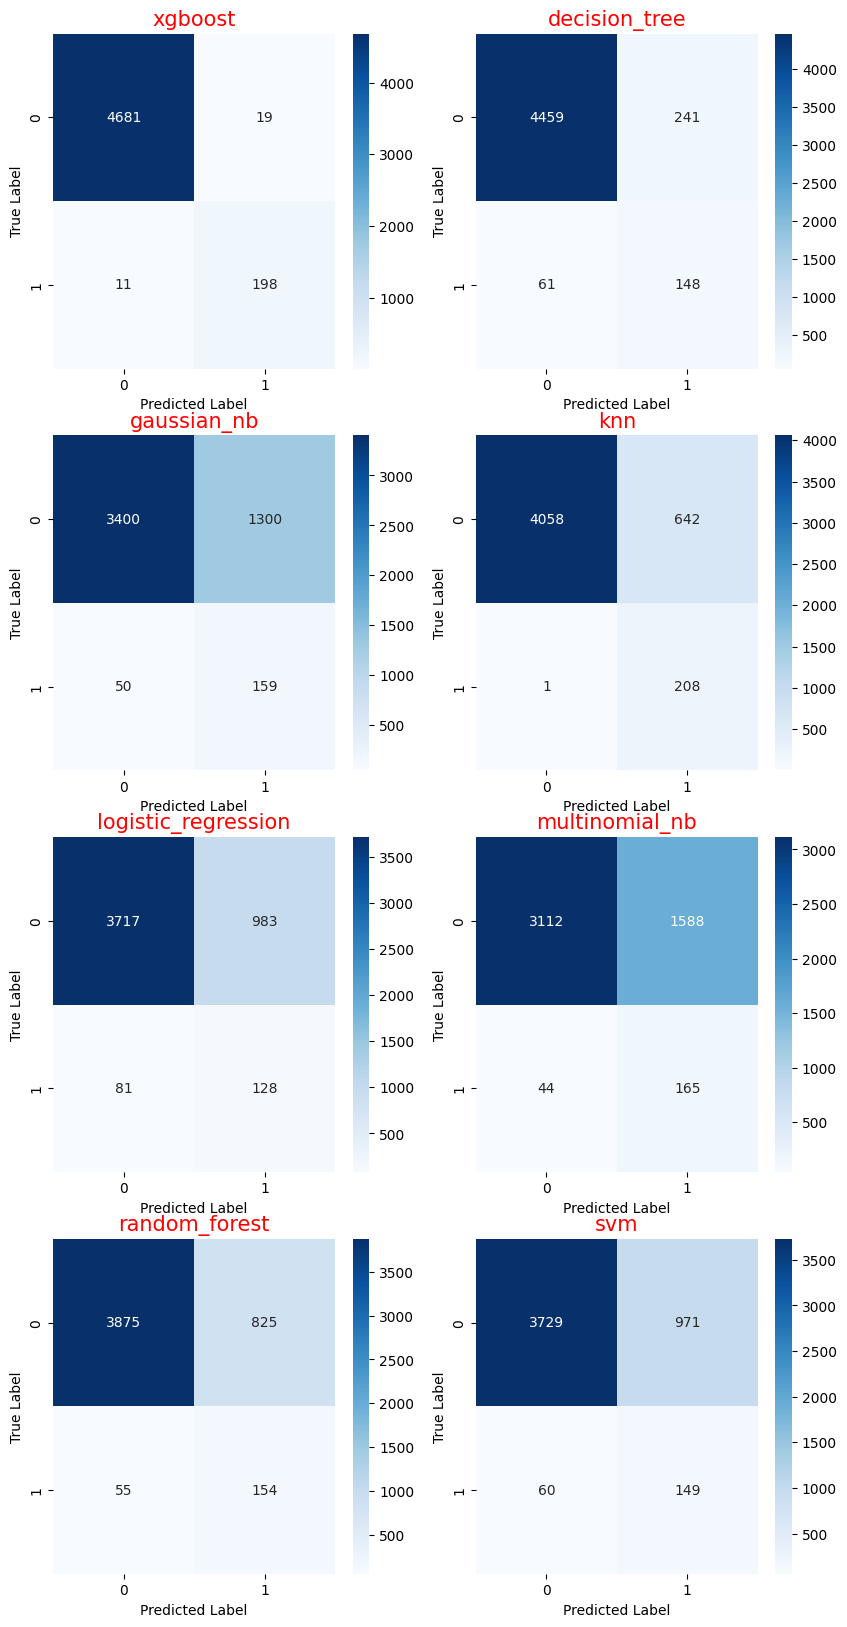

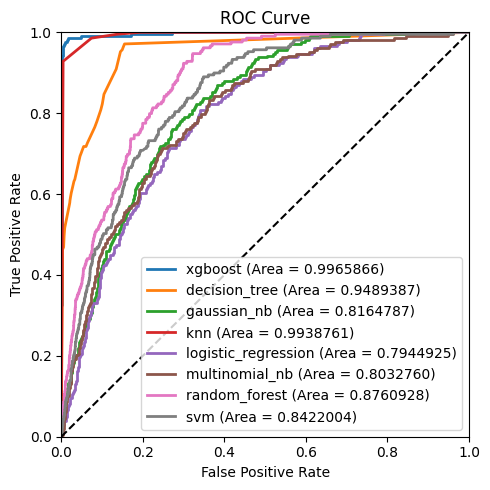

In [ ]:
model_files = [
    'best_xgboost_model.pkl',
    'best_decision_tree_model.pkl',
    'best_gaussian_nb_model.pkl',
    'best_knn_model.pkl',
    'best_logistic_regression_model.pkl',
    'best_multinomial_nb_model.pkl',
    'best_random_forest_model.pkl',
    'best_svm_model.pkl']

performance_data = []

fig, axes = plt.subplots(4, 2, figsize=(10, 20))
axes = axes.flatten()

roc_fig, roc_ax = plt.subplots(figsize=(5, 5))

for i, model_file in enumerate(model_files):
    with open(model_file, 'rb') as file:
        model = pickle.load(file)

    model_name = model_file.replace('best_', '').replace('_model.pkl', '')

    predictions = model.predict(X)
    probas = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, probas)
    roc_auc = auc(fpr, tpr)

    roc_ax.plot(fpr, tpr, lw=2, label=f'{model_name} (Area = {roc_auc:.7f})')

    cm = confusion_matrix(y, predictions)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(model_name, fontsize=15, color='red')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

    accuracy = accuracy_score(y, predictions)
    f1 = f1_score(y, predictions, average='weighted')
    recall = recall_score(y, predictions, average='weighted')
    precision = precision_score(y, predictions, average='weighted')

    print(f"Model: {model_name}")
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Recall:", recall)
    print("Precision:", precision)
    print("Roc auc:", roc_auc)
    print("\n")

    performance_data.append({
    'Model': model_name,
    'Accuracy': accuracy,
    'F1 Score': f1,
    'Recall': recall,
    'Precision': precision,
    'ROC AUC': roc_auc})

performance_df = pd.DataFrame(performance_data)
performance_df.to_csv('all_model_metrics.csv', index=False)

roc_ax.plot([0, 1], [0, 1], color='black', linestyle='--')
roc_ax.set_xlim([0, 1])
roc_ax.set_ylim([0, 1])
roc_ax.set_xlabel('False Positive Rate')
roc_ax.set_ylabel('True Positive Rate')
roc_ax.set_title('ROC Curve')
roc_ax.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [ ]:
df2 = pd.read_csv('all_model_metrics.csv')

df2

,Model,Accuracy,F1 Score,Recall,Precision,ROC AUC
0,xgboost,0.993889,0.993944,0.993889,0.994028,0.996587
1,decision_tree,0.938480,0.947139,0.938480,0.960702,0.948939
2,gaussian_nb,0.724995,0.806950,0.724995,0.948189,0.816479
3,knn,0.869016,0.903865,0.869016,0.967608,0.993876
4,logistic_regression,0.783255,0.845807,0.783255,0.941911,0.794493
5,multinomial_nb,0.667549,0.765691,0.667549,0.948084,0.803276
6,random_forest,0.820737,0.870835,0.820737,0.950723,0.876093
7,svm,0.789978,0.850691,0.789978,0.947928,0.842200


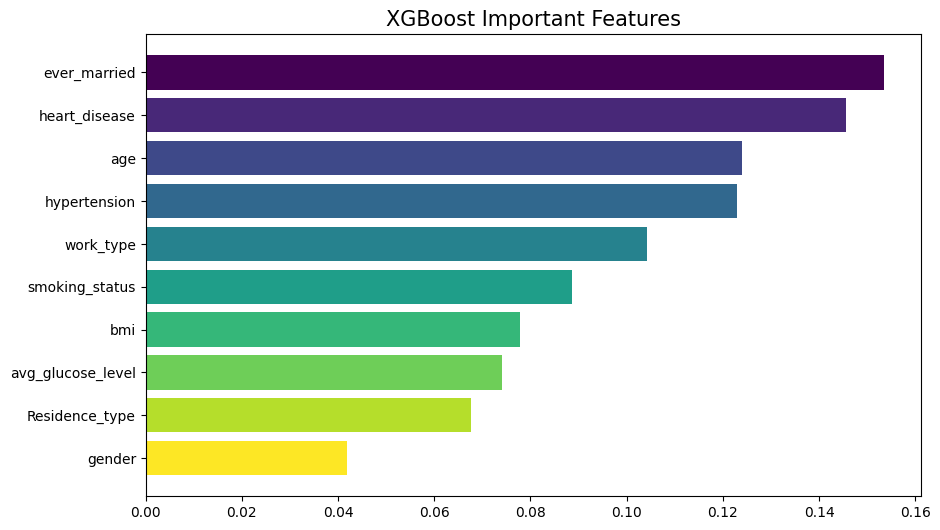

<Figure size 640x480 with 0 Axes>

In [ ]:
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

best_xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=1, max_depth=7, random_state=42)
best_xgb_model.fit(X_train, y_train)
importance = best_xgb_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance}).sort_values(by='Importance', ascending=False)

colors = plt.cm.viridis(np.linspace(0, 1, len(X.columns)))
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=colors)
plt.title('XGBoost Important Features', fontsize=15)
plt.gca().invert_yaxis()
plt.show()

plt.savefig('Features.png')

In [ ]:
'''
欠採樣
'''

'\n欠採樣\n'

In [ ]:
#欠採樣

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)
print(Counter(y_rus))

Counter({0: 209, 1: 209})


In [ ]:
#模型1: Decision Tree

from sklearn import tree

ratio = 100
ratiovalues = [i for i in range(10, ratio, 10)]
depth = 21
depthvalues = [i for i in range(1, depth)]
leaf = 10
leafvalues = [i for i in range(1, leaf)]
relative_best_train_score = 0
relative_best_test_score = 0
relative_best_ratio = 0
relative_best_depth = 0
relative_best_leaf = 0
relative_best_f1_score = 0
relative_best_recall = 0
relative_best_precision = 0
relative_best_roc_auc = 0

for k in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=k/100, random_state=42)
    for i in depthvalues:
        for j in leafvalues:
            clf = tree.DecisionTreeClassifier(random_state=42, max_depth=i, min_samples_leaf=j)
            clf.fit(X_train, y_train)
            y_pred_test = clf.predict(X_test)
            test_acc = accuracy_score(y_test, y_pred_test)

            fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
            roc_auc = auc(fpr, tpr)

            if roc_auc > relative_best_roc_auc:
                relative_best_train_score = accuracy_score(y_train, clf.predict(X_train))
                relative_best_test_score = test_acc
                relative_best_ratio = k
                relative_best_depth = i
                relative_best_leaf = j
                relative_best_f1_score = f1_score(y_test, y_pred_test, average='weighted')
                relative_best_recall = recall_score(y_test, y_pred_test, average='weighted')
                relative_best_precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=1)
                relative_best_roc_auc = roc_auc
                best_fpr, best_tpr = fpr, tpr
                best_cm = confusion_matrix(y_test, y_pred_test)
                best_clf = clf

print("best ratio of testing data:", relative_best_ratio,
        "\nbest depth:", relative_best_depth,
        "\nbest min_sample_leaf:", relative_best_leaf,
        "\nTraining score:", relative_best_train_score,
        "\nTesting score:", relative_best_test_score,
        "\nF1 score:", relative_best_f1_score,
        "\nRecall:", relative_best_recall,
        "\nPrecision:", relative_best_precision,
        "\nROC AUC:", relative_best_roc_auc,
        "\n\nConfusion Matrix:\n", best_cm)

with open('RUS_decision_tree_model.pkl', 'wb') as file:
    pickle.dump(best_clf, file)

best ratio of testing data: 10 
best depth: 2 
best min_sample_leaf: 1 
Training score: 0.773936170212766 
Testing score: 0.9047619047619048 
F1 score: 0.9034391534391534 
Recall: 0.9047619047619048 
Precision: 0.9194139194139194 
ROC AUC: 0.9477272727272728 

Confusion Matrix:
 [[16  4]
 [ 0 22]]


In [ ]:
#模型2: KNN

from sklearn import neighbors

ratio = 100
ratiovalues = [i for i in range(10, ratio, 10)]
neighbor = 10
neighborvalues = [i for i in range(1, neighbor)]
p = 3
pvalues = [i for i in range(1, p)]
relative_best_train_score = 0
relative_best_test_score = 0
relative_best_ratio = 0
relative_best_neighbor = 0
relative_best_p = 0
relative_best_f1_score = 0
relative_best_recall = 0
relative_best_precision = 0
relative_best_roc_auc = 0

for k in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=k/100, random_state=42)
    for i in neighborvalues:
        for j in pvalues:
            clf = neighbors.KNeighborsClassifier(n_neighbors=i, p=j)
            clf.fit(X_train, y_train)
            y_pred_test = clf.predict(X_test)
            test_acc = accuracy_score(y_test, y_pred_test)

            fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
            roc_auc = auc(fpr, tpr)

            if roc_auc > relative_best_roc_auc:
                relative_best_train_score = accuracy_score(y_train, clf.predict(X_train))
                relative_best_test_score = test_acc
                relative_best_ratio = k
                relative_best_neighbor = i
                relative_best_p = j
                relative_best_f1_score = f1_score(y_test, y_pred_test, average='weighted')
                relative_best_recall = recall_score(y_test, y_pred_test, average='weighted')
                relative_best_precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=1)
                relative_best_roc_auc = roc_auc
                best_fpr, best_tpr = fpr, tpr
                best_cm = confusion_matrix(y_test, y_pred_test)
                best_clf = clf

print("best ratio of testing data:", relative_best_ratio,
        "\nbest neighbors:", relative_best_neighbor,
        "\nbest p:", relative_best_p,
        "\nTraining score:", relative_best_train_score,
        "\nTesting score:", relative_best_test_score,
        "\nF1 score:", relative_best_f1_score,
        "\nRecall:", relative_best_recall,
        "\nPrecision:", relative_best_precision,
        "\nROC AUC:", relative_best_roc_auc,
        "\n\nconfusion matrix:\n", best_cm)

with open('RUS_knn_model.pkl', 'wb') as file:
    pickle.dump(best_clf, file)

best ratio of testing data: 10 
best neighbors: 9 
best p: 1 
Training score: 0.7686170212765957 
Testing score: 0.7857142857142857 
F1 score: 0.7813411078717201 
Recall: 0.7857142857142857 
Precision: 0.8007054673721341 
ROC AUC: 0.8920454545454545 

confusion matrix:
 [[13  7]
 [ 2 20]]


In [ ]:
#模型3: RandomForest

from sklearn.ensemble import RandomForestClassifier

ratio = 100
ratiovalues = [i for i in range(10, ratio, 10)]
n_estimator = 250
n_estimatorvalues = [i for i in range(100, n_estimator, 50)]
depth = 8
depthvalues = [i for i in range(1, depth)]
leaf = 5
leafvalues = [i for i in range(1, leaf)]
relative_best_train_score = 0
relative_best_test_score = 0
relative_best_ratio = 0
relative_best_estimators = 0
relative_best_depth = 0
relative_best_leaf = 0
relative_best_f1_score = 0
relative_best_recall = 0
relative_best_precision = 0
relative_best_roc_auc = 0

for k in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=k/100, random_state=71)
    for l in n_estimatorvalues:
        for i in depthvalues:
            for j in leafvalues:
                clf = RandomForestClassifier(random_state=71, n_estimators=l, max_depth=i, min_samples_leaf=j)
                clf.fit(X_train, y_train)
                y_pred_test = clf.predict(X_test)
                test_acc = accuracy_score(y_test, y_pred_test)

                fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
                roc_auc = auc(fpr, tpr)

                if roc_auc > relative_best_roc_auc:
                    relative_best_train_score = accuracy_score(y_train, clf.predict(X_train))
                    relative_best_test_score = test_acc
                    relative_best_ratio = k
                    relative_best_estimators = l
                    relative_best_depth = i
                    relative_best_leaf = j
                    relative_best_f1_score = f1_score(y_test, y_pred_test, average='weighted')
                    relative_best_recall = recall_score(y_test, y_pred_test, average='weighted')
                    relative_best_precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=1)
                    relative_best_roc_auc = roc_auc
                    best_fpr, best_tpr = fpr, tpr
                    best_cm = confusion_matrix(y_test, y_pred_test)
                    best_clf = clf

print("best ratio of testing data:", relative_best_ratio,
        "\nbest no. of estimators:", relative_best_estimators,
        "\nbest depth:", relative_best_depth,
        "\nbest min_sample_leaf:", relative_best_leaf,
        "\nTraining score:", relative_best_train_score,
        "\nTesting score:", relative_best_test_score,
        "\nF1 score:", relative_best_f1_score,
        "\nRecall:", relative_best_recall,
        "\nPrecision:", relative_best_precision,
        "\nROC AUC:", relative_best_roc_auc,
        "\n\nconfusion matrix:\n", best_cm)

with open('RUS_random_forest_model.pkl', 'wb') as file:
    pickle.dump(best_clf, file)

best ratio of testing data: 10 
best no. of estimators: 100 
best depth: 2 
best min_sample_leaf: 4 
Training score: 0.7872340425531915 
Testing score: 0.7380952380952381 
F1 score: 0.7412291412291413 
Recall: 0.7380952380952381 
Precision: 0.7857687697504632 
ROC AUC: 0.8581730769230769 

confusion matrix:
 [[17  9]
 [ 2 14]]


In [ ]:
#模型4: XGBoost

from xgboost.sklearn import XGBClassifier

ratio = 100
ratiovalues = [i for i in range(10, ratio, 10)]
n_estimator = 250
n_estimatorvalues = [i for i in range(100, n_estimator, 50)]
depth = 8
depthvalues = [i for i in range(1, depth)]
rate = 3
ratevalues = [i for i in range(1, rate)]
relative_best_train_score = 0
relative_best_test_score = 0
relative_best_ratio = 0
relative_best_estimators = 0
relative_best_depth = 0
relative_best_rate = 0
relative_best_f1_score = 0
relative_best_recall = 0
relative_best_precision = 0
relative_best_roc_auc = 0

for k in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=k/100, random_state=42)
    for l in n_estimatorvalues:
        for i in depthvalues:
            for j in ratevalues:
                clf = XGBClassifier(random_state=42, n_estimators=l, max_depth=i, learning_rate=j)
                clf.fit(X_train, y_train)
                y_pred_test = clf.predict(X_test)
                test_acc = accuracy_score(y_test, y_pred_test)

                fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
                roc_auc = auc(fpr, tpr)

                if roc_auc > relative_best_roc_auc:
                    relative_best_train_score = accuracy_score(y_train, clf.predict(X_train))
                    relative_best_test_score = test_acc
                    relative_best_ratio = k
                    relative_best_estimators = l
                    relative_best_depth = i
                    relative_best_rate = j
                    relative_best_f1_score = f1_score(y_test, y_pred_test, average='weighted')
                    relative_best_recall = recall_score(y_test, y_pred_test, average='weighted')
                    relative_best_precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=1)
                    relative_best_roc_auc = roc_auc
                    best_fpr, best_tpr = fpr, tpr
                    best_cm = confusion_matrix(y_test, y_pred_test)
                    best_clf = clf

print("best ratio of testing data:", relative_best_ratio,
        "\nbest no. of estimators:", relative_best_estimators,
        "\nbest depth:", relative_best_depth,
        "\nbest learning_rate:", relative_best_rate,
        "\nTraining score:", relative_best_train_score,
        "\nTesting score:", relative_best_test_score,
        "\nF1 score:", relative_best_f1_score,
        "\nRecall:", relative_best_recall,
        "\nPrecision:", relative_best_precision,
        "\nROC AUC:", relative_best_roc_auc,
        "\n\nconfusion matrix:\n", best_cm)

with open('RUS_xgboost_model.pkl', 'wb') as file:
    pickle.dump(best_clf, file)

best ratio of testing data: 10 
best no. of estimators: 150 
best depth: 7 
best learning_rate: 1 
Training score: 1.0 
Testing score: 0.8333333333333334 
F1 score: 0.8318957255127467 
Recall: 0.8333333333333334 
Precision: 0.8392156862745098 
ROC AUC: 0.9181818181818182 

confusion matrix:
 [[15  5]
 [ 2 20]]


In [ ]:
#模型5: LogisticRegression

from sklearn.linear_model import LogisticRegression

ratio = 100
ratio_values = [i for i in range(10, ratio, 10)]
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
class_weight_values = [None, 'balanced']
solver_values = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

best_train_score = 0
best_test_score = 0
best_ratio = 0
best_C = 0
best_class_weight = ''
best_solver = ''
best_f1_score = 0
best_recall = 0
best_precision = 0
best_roc_auc = 0

for k in ratio_values:
    X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=k/100, random_state=42)
    for i in C_values:
        for j in class_weight_values:
            for r in solver_values:
                clf = LogisticRegression(C=i, class_weight=j, solver=r, max_iter=1000)
                clf.fit(X_train, y_train)
                y_pred_test = clf.predict(X_test)
                test_acc = accuracy_score(y_test, y_pred_test)

                fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
                roc_auc = auc(fpr, tpr)

                if roc_auc > best_roc_auc:
                    best_train_score = accuracy_score(y_train, clf.predict(X_train))
                    best_test_score = test_acc
                    best_ratio = k
                    best_C = i
                    best_class_weight = j
                    best_solver = r
                    best_f1_score = f1_score(y_test, y_pred_test, average='weighted')
                    best_recall = recall_score(y_test, y_pred_test, average='weighted')
                    best_precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=1)
                    best_roc_auc = roc_auc
                    best_fpr, best_tpr = fpr, tpr
                    best_cm = confusion_matrix(y_test, y_pred_test)
                    best_clf = clf

print("best ratio of testing data:", best_ratio,
        "\nbest C:", best_C,
        "\nbest class weight:", best_class_weight,
        "\nbest solver:", best_solver,
        "\nTraining score:", best_train_score,
        "\nTesting score:", best_test_score,
        "\nF1 score:", best_f1_score,
        "\nRecall:", best_recall,
        "\nPrecision:", best_precision,
        "\nROC AUC:", best_roc_auc,
        "\n\nconfusion matrix:\n", best_cm)

with open('RUS_logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(best_clf, file)

best ratio of testing data: 10 
best C: 0.01 
best class weight: None 
best solver: newton-cg 
Training score: 0.7712765957446809 
Testing score: 0.8809523809523809 
F1 score: 0.8799255182233905 
Recall: 0.8809523809523809 
Precision: 0.8881792717086835 
ROC AUC: 0.9340909090909091 

confusion matrix:
 [[16  4]
 [ 1 21]]


In [ ]:
#模型6: Gaussian Naive bayes

from sklearn.naive_bayes import GaussianNB

ratio = 100
ratiovalues = [i for i in range(10, ratio, 10)]
relative_best_train_score = 0
relative_best_test_score = 0
relative_best_ratio = 0
relative_best_f1_score = 0
relative_best_recall = 0
relative_best_precision = 0
relative_best_roc_auc = 0

for k in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=k/100, random_state=42)
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    y_pred_test = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)

    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    if roc_auc > relative_best_roc_auc:
        relative_best_train_score = accuracy_score(y_train, clf.predict(X_train))
        relative_best_test_score = test_acc
        relative_best_ratio = k
        relative_best_f1_score = f1_score(y_test, y_pred_test, average='weighted')
        relative_best_recall = recall_score(y_test, y_pred_test, average='weighted')
        relative_best_precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=1)
        relative_best_roc_auc = roc_auc
        best_fpr, best_tpr = fpr, tpr
        best_cm = confusion_matrix(y_test, y_pred_test)
        best_clf = clf

print("best ratio of testing data:", relative_best_ratio,
        "\nTraining score:", relative_best_train_score,
        "\nTesting score:", relative_best_test_score,
        "\nF1 score:", relative_best_f1_score,
        "\nRecall:", relative_best_recall,
        "\nPrecision:", relative_best_precision,
        "\nROC AUC:", relative_best_roc_auc,
        "\n\nconfusion matrix:\n", best_cm)


with open('RUS_gaussian_nb_model.pkl', 'wb') as file:
    pickle.dump(best_clf, file)

best ratio of testing data: 10 
Training score: 0.7473404255319149 
Testing score: 0.9047619047619048 
F1 score: 0.9047619047619048 
Recall: 0.9047619047619048 
Precision: 0.9047619047619048 
ROC AUC: 0.9704545454545455 

confusion matrix:
 [[18  2]
 [ 2 20]]


In [ ]:
#模型7: Multinomail Naive bayes

from sklearn.naive_bayes import MultinomialNB

ratio = 100
ratiovalues = [i for i in range(10, ratio, 10)]
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]
fit_prior_values = [True, False]
class_prior_values = [None, [0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5]]

relative_best_train_score = 0
relative_best_test_score = 0
relative_best_ratio = 0
relative_best_alpha = 0
relative_best_fit_prior = True
relative_best_class_prior = None
relative_best_f1_score = 0
relative_best_recall = 0
relative_best_precision = 0
relative_best_roc_auc = 0

for k in ratiovalues:
    X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=k/100, random_state=42)
    for i in alpha_values:
        for j in fit_prior_values:
            for r in class_prior_values:
                clf = MultinomialNB(alpha=i, fit_prior=j, class_prior=r)
                clf.fit(X_train, y_train)
                y_pred_test = clf.predict(X_test)
                test_acc = accuracy_score(y_test, y_pred_test)

                fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
                roc_auc = auc(fpr, tpr)

                if roc_auc > relative_best_roc_auc:
                    relative_best_train_score = accuracy_score(y_train, clf.predict(X_train))
                    relative_best_test_score = test_acc
                    relative_best_ratio = k
                    relative_best_alpha = i
                    relative_best_fit_prior = j
                    relative_best_class_prior = r
                    relative_best_f1_score = f1_score(y_test, y_pred_test, average='weighted')
                    relative_best_recall = recall_score(y_test, y_pred_test, average='weighted')
                    relative_best_precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=1)
                    relative_best_roc_auc = roc_auc
                    best_fpr, best_tpr = fpr, tpr
                    best_cm = confusion_matrix(y_test, y_pred_test)
                    best_clf = clf

print("best ratio of testing data:", relative_best_ratio,
        "\nbest alpha:", relative_best_alpha,
        "\nbest fit_prior:", relative_best_fit_prior,
        "\nbest class_prior:", relative_best_class_prior,
        "\nTraining score:", relative_best_train_score,
        "\nTesting score:", relative_best_test_score,
        "\nF1 score:", relative_best_f1_score,
        "\nRecall:", relative_best_recall,
        "\nPrecision:", relative_best_precision,
        "\nROC AUC:", relative_best_roc_auc,
        "\n\nconfusion matrix:\n", best_cm)

with open('RUS_multinomial_nb_model.pkl', 'wb') as file:
    pickle.dump(best_clf, file)

best ratio of testing data: 90 
best alpha: 100 
best fit_prior: True 
best class_prior: None 
Training score: 0.7317073170731707 
Testing score: 0.6896551724137931 
F1 score: 0.6648300441403889 
Recall: 0.6896551724137931 
Precision: 0.7650829344378398 
ROC AUC: 0.7996904024767801 

confusion matrix:
 [[ 78 109]
 [  8 182]]


In [ ]:
#模型8 SVM

from sklearn import svm
from sklearn.model_selection import GridSearchCV

kernel_values = ["rbf", "poly"]
gamma_values = ["scale"]
param_grid = {'kernel': kernel_values, 'gamma': gamma_values,}

X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2, random_state=42)
svc = svm.SVC(random_state=42, probability=True)
grid = GridSearchCV(svc, param_grid, refit=True, cv=3, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred_test = best_model.predict(X_test)

fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
best_cm = confusion_matrix(y_test, y_pred_test)

print("Best parameters found:", grid.best_params_,
      "\nROC AUC:", roc_auc,
      "\n\nconfusion matrix:\n", best_cm)

with open('RUS_svm_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

Best parameters found: {'gamma': 'scale', 'kernel': 'rbf'} 
ROC AUC: 0.8089569160997733 

confusion matrix:
 [[27 15]
 [ 5 37]]


Model: xgboost
Accuracy: 0.7254023222652272
F1 Score: 0.807223836043165
Recall: 0.7254023222652272
Precision: 0.9625293830246888
Roc auc: 0.920776748447521


Model: decision_tree
Accuracy: 0.6730495009166837
F1 Score: 0.7695316022257518
Recall: 0.6730495009166837
Precision: 0.9533008114285171
Roc auc: 0.8291682785299805


Model: gaussian_nb
Accuracy: 0.7044204522305969
F1 Score: 0.7924519179098534
Recall: 0.7044204522305969
Precision: 0.9498717969060505
Roc auc: 0.8247826529573451


Model: knn
Accuracy: 0.6636789570177225
F1 Score: 0.7625216609507949
Recall: 0.6636789570177225
Precision: 0.9537070016583644
Roc auc: 0.8439662017713528


Model: logistic_regression
Accuracy: 0.7162354858423304
F1 Score: 0.8008145691877983
Recall: 0.7162354858423304
Precision: 0.9520387125193086
Roc auc: 0.8414170823577318


Model: multinomial_nb
Accuracy: 0.44000814829904256
F1 Score: 0.5682717597409451
Recall: 0.44000814829904256
Precision: 0.9554513068150813
Roc auc: 0.7764603481624757


Model: random_f

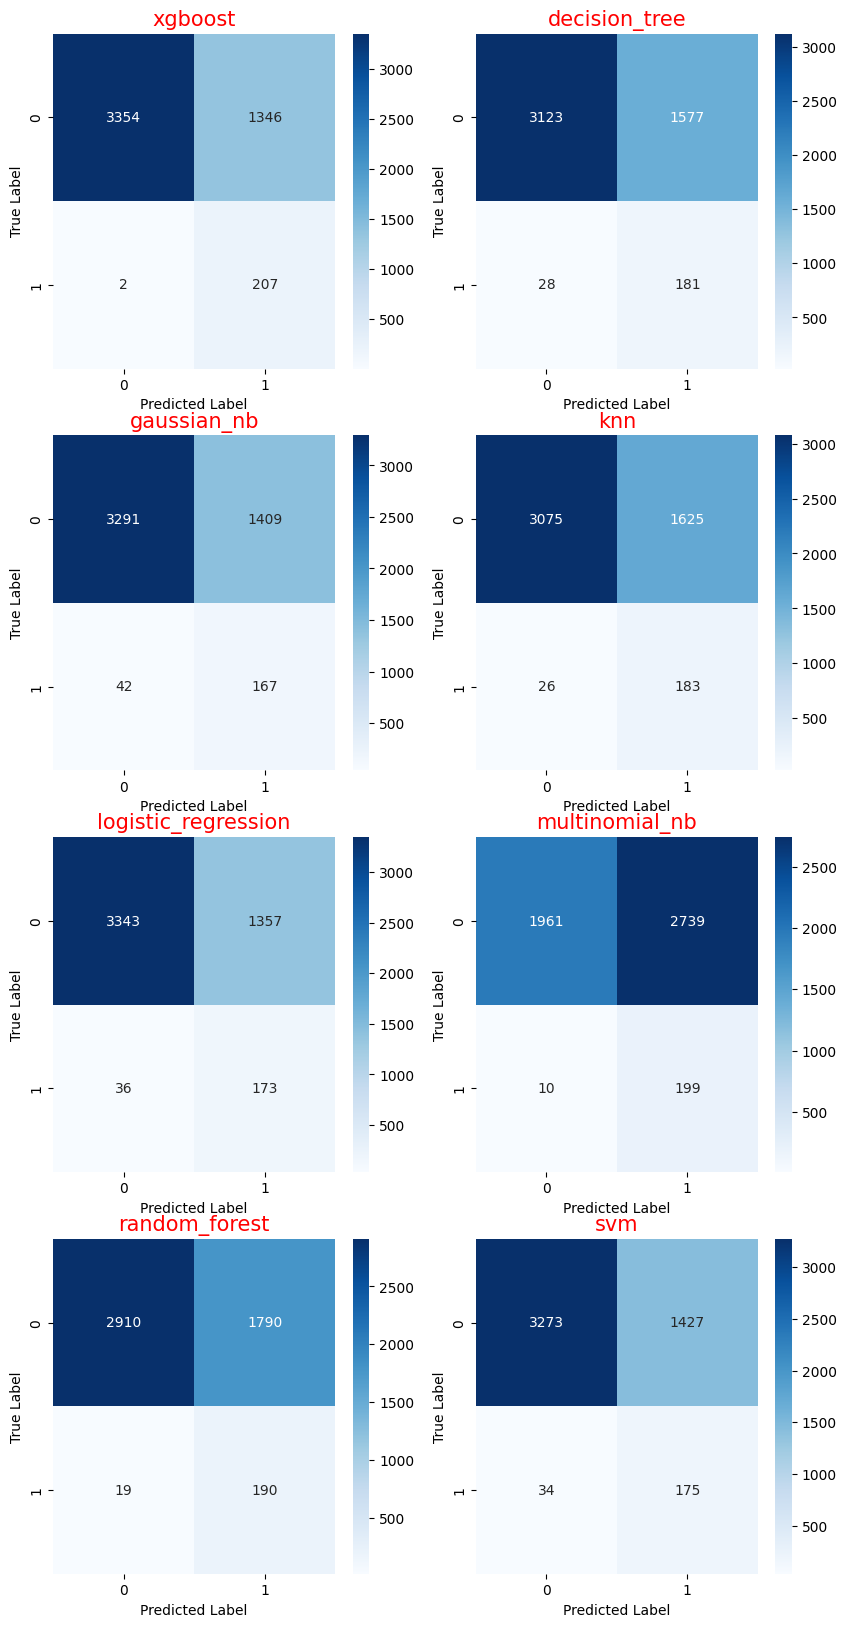

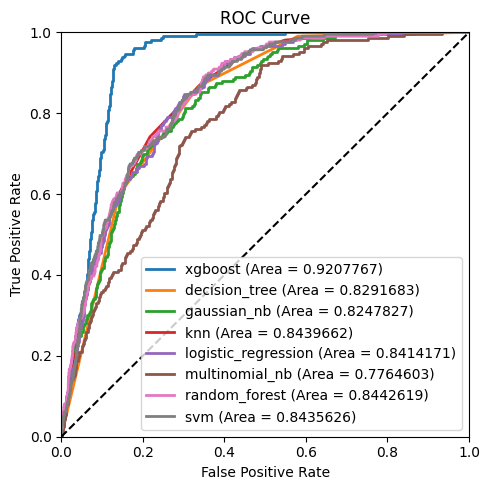

In [ ]:
model_files = [
    'RUS_xgboost_model.pkl',
    'RUS_decision_tree_model.pkl',
    'RUS_gaussian_nb_model.pkl',
    'RUS_knn_model.pkl',
    'RUS_logistic_regression_model.pkl',
    'RUS_multinomial_nb_model.pkl',
    'RUS_random_forest_model.pkl',
    'RUS_svm_model.pkl']

performance_data = []

fig, axes = plt.subplots(4, 2, figsize=(10, 20))
axes = axes.flatten()

roc_fig, roc_ax = plt.subplots(figsize=(5, 5))

for i, model_file in enumerate(model_files):
    with open(model_file, 'rb') as file:
        model = pickle.load(file)

    model_name = model_file.replace('RUS_', '').replace('_model.pkl', '')

    predictions = model.predict(X)
    probas = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, probas)
    roc_auc = auc(fpr, tpr)

    roc_ax.plot(fpr, tpr, lw=2, label=f'{model_name} (Area = {roc_auc:.7f})')

    cm = confusion_matrix(y, predictions)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(model_name, fontsize=15, color='red')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

    accuracy = accuracy_score(y, predictions)
    f1 = f1_score(y, predictions, average='weighted')
    recall = recall_score(y, predictions, average='weighted')
    precision = precision_score(y, predictions, average='weighted')

    print(f"Model: {model_name}")
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Recall:", recall)
    print("Precision:", precision)
    print("Roc auc:", roc_auc)
    print("\n")

    performance_data.append({
    'Model': model_name,
    'Accuracy': accuracy,
    'F1 Score': f1,
    'Recall': recall,
    'Precision': precision,
    'ROC AUC': roc_auc})

performance_df = pd.DataFrame(performance_data)
performance_df.to_csv('all_RUS_model_metrics.csv', index=False)

roc_ax.plot([0, 1], [0, 1], color='black', linestyle='--')
roc_ax.set_xlim([0, 1])
roc_ax.set_ylim([0, 1])
roc_ax.set_xlabel('False Positive Rate')
roc_ax.set_ylabel('True Positive Rate')
roc_ax.set_title('ROC Curve')
roc_ax.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [ ]:
df_rus = pd.read_csv('all_RUS_model_metrics.csv')

df_rus

,Model,Accuracy,F1 Score,Recall,Precision,ROC AUC
0,xgboost,0.725402,0.807224,0.725402,0.962529,0.920777
1,decision_tree,0.673050,0.769532,0.673050,0.953301,0.829168
2,gaussian_nb,0.704420,0.792452,0.704420,0.949872,0.824783
3,knn,0.663679,0.762522,0.663679,0.953707,0.843966
4,logistic_regression,0.716235,0.800815,0.716235,0.952039,0.841417
5,multinomial_nb,0.440008,0.568272,0.440008,0.955451,0.776460
6,random_forest,0.631493,0.737790,0.631493,0.955300,0.844262
7,svm,0.702383,0.790956,0.702383,0.952232,0.843563
